<a href="https://colab.research.google.com/github/taadith/python-projects/blob/main/intro-stat-learning/labs/ISLP_Lab_Ch_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Statistical Learning - Lab 02
Dataset provided by Introduction to Statistical Learning
(from this website: https://www.statlearning.com/resources-python)

**Note: Assuming that *Auto.csv* is in same folder as this notebook.**

## Installing libraries

It's necessary that we ensure the following libraries to use for this lab...

In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install os


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python3.12 -m pip install --upgrade pip

[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python3.12 -m pip install --upgrade pip

[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python3.12 -m pip install --upgrade pip

[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python3.12 -m pip install --upgrade pip


##Basic Commands

The ```?``` command helps provide information about functions by providing it's respective Docstring. Here's the ```print()```'s function Docstring...

In [2]:
print?

Signature: print(*args, sep=' ', end='\n', file=None, flush=False)
Docstring:
Prints the values to a stream, or to sys.stdout by default.

sep
  string inserted between values, default a space.
end
  string appended after the last value, default a newline.
file
  a file-like object (stream); defaults to the current sys.stdout.
flush
  whether to forcibly flush the stream.
Type:      builtin_function_or_method

In [3]:
print("fit a model with", 11, "variables")

fit a model with 11 variables


In Python, there are three important type of sequences, ordered lists: lists, tuples, and strings. We introduce lists...

In [4]:
x = [1, 2, 3]
y = [4, 5, 6]
x + y

[1, 2, 3, 4, 5, 6]

In Python, lists hold arbitary objects and are added by concatentation, not element-by-element. This makes sense since Python is designed as a general-purpose programming language. Python's data-specific functionality comes from the *numpy* and *pandas* packages!

## Intro to Numerical Python

In [5]:
import numpy as np

###Numpy Arrays

In *numpy*, an array is a generic term for a multidimensional set, in the non-mathematical sense, of numbers.

In [6]:
np.array?

Docstring:
array(object, dtype=None, *, copy=True, order='K', subok=False, ndmin=0,
      like=None)

Create an array.

Parameters
----------
object : array_like
    An array, any object exposing the array interface, an object whose
    ``__array__`` method returns an array, or any (nested) sequence.
    If object is a scalar, a 0-dimensional array containing object is
    returned.
dtype : data-type, optional
    The desired data-type for the array. If not given, NumPy will try to use
    a default ``dtype`` that can represent the values (by applying promotion
    rules when necessary.)
copy : bool, optional
    If ``True`` (default), then the array data is copied. If ``None``,
    a copy will only be made if ``__array__`` returns a copy, if obj is
    a nested sequence, or if a copy is needed to satisfy any of the other
    requirements (``dtype``, ``order``, etc.). Note that any copy of
    the data is shallow, i.e., for arrays with object dtype, the new
    array will point to the 

We see that the *numpy* arrays are added to each other element-by-element instead of being concatenated!!! Yayyy!

In [7]:
x = np.array([1, 2, 3])
y = np.array([4, 5, 6])
x + y

array([5, 7, 9])

Besides one-dimensional *numpy* arrays, we can essentially make a n-dimensional *numpy* array, where $n$ is any integer greater than or equal to $1$ that is computationally possible...

In [8]:
x_1d = np.array([1, 2])
x_2d = np.array([[1, 2], [3, 4]])
x_3d = np.array([[[1, 2], [3, 4]], [[5, 6], [7, 8]], [[9, 10], [11, 12]], [[13, 14], [15, 16]]])

We can observe the dimensions of a *numpy* array using the attribute ```ndim```...

In [9]:
print("x_1d dimensions:", x_1d.ndim)
print("x_2d dimensions:", x_2d.ndim)
print("x_3d dimensions:", x_3d.ndim)

x_1d dimensions: 1
x_2d dimensions: 2
x_3d dimensions: 3


Along with the dimensions of the *numpy* array, the shape of the array itself can be observed with the ```shape``` attribute...

In [10]:
print("x_1d shape:", x_1d.shape)
print("x_2d shape:", x_2d.shape)
print("x_3d shape:", x_3d.shape)

x_1d shape: (2,)
x_2d shape: (2, 2)
x_3d shape: (4, 2, 2)


The data type stored within the numpy array can be observed using ```dtype()```...

In [11]:
print("x_1d dtype:", x_1d.dtype)
print("x_2d dtype:", x_2d.dtype)
print("x_3d dtype:", x_3d.dtype)

x_1d dtype: int64
x_2d dtype: int64
x_3d dtype: int64


The ```reshape()``` method returns a new array with the same elements the *numpy* array that calls.

In [12]:
np.reshape?

Signature:       np.reshape(a, newshape, order='C')
Call signature:  np.reshape(*args, **kwargs)
Type:            _ArrayFunctionDispatcher
String form:     <function reshape at 0x105c9aac0>
File:            /opt/homebrew/lib/python3.12/site-packages/numpy/_core/fromnumeric.py
Docstring:      
Gives a new shape to an array without changing its data.

Parameters
----------
a : array_like
    Array to be reshaped.
newshape : int or tuple of ints
    The new shape should be compatible with the original shape. If
    an integer, then the result will be a 1-D array of that length.
    One shape dimension can be -1. In this case, the value is
    inferred from the length of the array and remaining dimensions.
order : {'C', 'F', 'A'}, optional
    Read the elements of `a` using this index order, and place the
    elements into the reshaped array using this index order.  'C'
    means to read / write the elements using C-like index order,
    with the last axis index changing fastest, back to t

It's important to note that ```x``` and ```x.reshape``` occupy the same memory region. We can observe this by modifying ```x_reshape``` and then observing the two...

In [14]:
x_reshape[0, 0] = 99
x, x_reshape

(array([99,  2,  3,  4,  5,  6]),
 array([[99,  2,  3],
        [ 4,  5,  6]]))

In [13]:
x = np.array([1, 2, 3, 4, 5, 6])
x_reshape = x.reshape(2, 3)
x, x_reshape

(array([1, 2, 3, 4, 5, 6]),
 array([[1, 2, 3],
        [4, 5, 6]]))

...heyyyy this reminds me of a pointer

Interestingly, we ***CANNOT*** modify a tuple (uncomment the following code block)...

In [15]:
# tup = (1, 2, 3)
# tup[0] = 99

###Generating random data



The ```np.random.normal()``` function generates a vector of random normal variables.

In [16]:
np.random.normal?

Signature: np.random.normal(loc=0.0, scale=1.0, size=None)
Docstring:
normal(loc=0.0, scale=1.0, size=None)

Draw random samples from a normal (Gaussian) distribution.

The probability density function of the normal distribution, first
derived by De Moivre and 200 years later by both Gauss and Laplace
independently [2]_, is often called the bell curve because of
its characteristic shape (see the example below).

The normal distributions occurs often in nature.  For example, it
describes the commonly occurring distribution of samples influenced
by a large number of tiny, random disturbances, each with its own
unique distribution [2]_.

.. note::
    New code should use the `~numpy.random.Generator.normal`
    method of a `~numpy.random.Generator` instance instead;
    please see the :ref:`random-quick-start`.

Parameters
----------
loc : float or array_like of floats
    Mean ("centre") of the distribution.
scale : float or array_like of floats
    Standard deviation (spread or "width")

From the generated Docstring's first line, we see ```normal(loc=0.0, scale=1.0, size=None)```.
This means that the function, by default, will generate random normal variable(s) with a mean (```loc```) of 0 and a standard deviation (```scale```) of 1. Furthermore, a single random variable will be generated unless ```size```'s argument is changed.

We will now generate $50$ random independent variables from a $N(0, 1)$ distribution...

In [17]:
x = np.random.normal(0, 1, 50)
x

array([-1.07121071,  0.33509007, -0.1292875 ,  0.87290511,  0.93182091,
       -0.89835076, -1.24597198,  1.25822135, -1.77689401,  0.50528794,
       -1.12816847, -0.46904605,  1.49728754, -0.32268114,  0.96983145,
        1.80636671,  0.4686049 , -0.94826849, -0.52639281, -0.46170794,
        1.616726  ,  0.10356236,  1.45010467,  0.43245132, -0.53354637,
       -0.18067391,  1.50754102,  1.14944501,  1.12547705, -0.39125762,
       -1.25383636,  0.54215699,  0.69585374,  0.34182227, -0.05975028,
        0.38812859, -0.25357576,  0.93866162, -0.9096172 , -0.08249757,
        0.50738858,  0.37189984, -0.63740449,  0.34562789,  0.73198361,
       -0.52829948,  1.13319098,  1.0766366 , -1.0678593 , -0.31913555])

We can create an array ```y``` by adding an independent $N(0, 1)$ random variable to each element of ```x```...

In [18]:
y = x + np.random.normal(0, 1, 50)
y

array([-0.27967063,  1.04463471,  0.69911621,  1.064009  , -0.28904037,
       -3.34087438, -2.77263728, -0.2831323 , -1.74662495, -0.18311797,
       -2.05716472, -0.30272522,  1.65775218, -1.07645534,  2.6402044 ,
        1.57781877,  2.09918157, -1.48813507,  0.67486443, -0.46729883,
        3.19934001,  0.59523285,  0.31184849,  2.5764751 ,  0.02620284,
       -1.23430099,  1.76101392, -0.4799358 ,  1.09194969, -0.04528348,
       -1.51716394, -0.46289049,  2.1215592 ,  0.05396525,  1.02024044,
       -2.61992805,  2.54964891,  0.40151595, -0.73046114,  0.69043247,
        0.25376103,  1.07331194, -1.09105718,  0.42084373,  1.87128609,
       -0.41071504,  0.52083654,  2.24776859, -0.17048839, -0.41876846])

We can calulate the correlation matrix between ```x``` and ```y``` using the ```np.corrcoef()``` function. The off-diagonal elements gives the correlation between ```x``` and ```y```.

In [19]:
np.corrcoef?
np.corrcoef(x, y)

Signature:      
np.corrcoef(
    x,
    y=None,
    rowvar=True,
    bias=<no value>,
    ddof=<no value>,
    *,
    dtype=None,
)
Call signature:  np.corrcoef(*args, **kwargs)
Type:            _ArrayFunctionDispatcher
String form:     <function corrcoef at 0x109365120>
File:            /opt/homebrew/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py
Docstring:      
Return Pearson product-moment correlation coefficients.

Please refer to the documentation for `cov` for more detail.  The
relationship between the correlation coefficient matrix, `R`, and the
covariance matrix, `C`, is

.. math:: R_{ij} = \frac{ C_{ij} } { \sqrt{ C_{ii} C_{jj} } }

The values of `R` are between -1 and 1, inclusive.

Parameters
----------
x : array_like
    A 1-D or 2-D array containing multiple variables and observations.
    Each row of `x` represents a variable, and each column a single
    observation of all those variables. Also see `rowvar` below.
y : array_like, optional
    An addition

In order to ensure that the code provides reproducible results, we can set the random seed using ```np.random.default_rng()```.

In [154]:
np.random.default_rng?
rng = np.random.default_rng(3)

Signature:      np.random.default_rng(seed=None)
Call signature: np.random.default_rng(*args, **kwargs)
Type:           cython_function_or_method
String form:    <cyfunction default_rng at 0x10954d700>
Docstring:     
default_rng(seed=None)
Construct a new Generator with the default BitGenerator (PCG64).

    Parameters
    ----------
    seed : {None, int, array_like[ints], SeedSequence, BitGenerator, Generator}, optional
        A seed to initialize the `BitGenerator`. If None, then fresh,
        unpredictable entropy will be pulled from the OS. If an ``int`` or
        ``array_like[ints]`` is passed, then all values must be non-negative and will be
        passed to `SeedSequence` to derive the initial `BitGenerator` state. One may also
        pass in a `SeedSequence` instance.
        Additionally, when passed a `BitGenerator`, it will be wrapped by
        `Generator`. If passed a `Generator`, it will be returned unaltered.

    Returns
    -------
    Generator
        The init

We can use the ```np.mean()```, ```np.var()```, and ```np.std()``` functions to compute the mean, variance, and standard deviation of arrays, respectively.

In [23]:
np.mean?

Signature:      
np.mean(
    a,
    axis=None,
    dtype=None,
    out=None,
    keepdims=<no value>,
    *,
    where=<no value>,
)
Call signature:  np.mean(*args, **kwargs)
Type:            _ArrayFunctionDispatcher
String form:     <function mean at 0x105ccd8a0>
File:            /opt/homebrew/lib/python3.12/site-packages/numpy/_core/fromnumeric.py
Docstring:      
Compute the arithmetic mean along the specified axis.

Returns the average of the array elements.  The average is taken over
the flattened array by default, otherwise over the specified axis.
`float64` intermediate and return values are used for integer inputs.

Parameters
----------
a : array_like
    Array containing numbers whose mean is desired. If `a` is not an
    array, a conversion is attempted.
axis : None or int or tuple of ints, optional
    Axis or axes along which the means are computed. The default is to
    compute the mean of the flattened array.

    .. versionadded:: 1.7.0

    If this is a tuple of ints,

In [24]:
x = rng.standard_normal(10)
np.mean(x), x.mean()

(np.float64(-0.1126795190952861), np.float64(-0.1126795190952861))

By default, ```np.var()``` divides by the sample size $n$ rather than $n - 1$. For more information, we should inspect the ```ddof```, or degrees of freedom, argument seen in ```np.var?```

In [25]:
np.var?

Signature:      
np.var(
    a,
    axis=None,
    dtype=None,
    out=None,
    ddof=0,
    keepdims=<no value>,
    *,
    where=<no value>,
    mean=<no value>,
    correction=<no value>,
)
Call signature:  np.var(*args, **kwargs)
Type:            _ArrayFunctionDispatcher
String form:     <function var at 0x105ccdb20>
File:            /opt/homebrew/lib/python3.12/site-packages/numpy/_core/fromnumeric.py
Docstring:      
Compute the variance along the specified axis.

Returns the variance of the array elements, a measure of the spread of a
distribution.  The variance is computed for the flattened array by
default, otherwise over the specified axis.

Parameters
----------
a : array_like
    Array containing numbers whose variance is desired.  If `a` is not an
    array, a conversion is attempted.
axis : None or int or tuple of ints, optional
    Axis or axes along which the variance is computed.  The default is to
    compute the variance of the flattened array.

    .. versionadded::

By default, ```ddof``` is set to zero.

In [26]:
np.var(x), x.var(), np.mean((y - y.mean())**2)

(np.float64(2.7243406406465125),
 np.float64(2.7243406406465125),
 np.float64(2.1061039131892483))

In [27]:
np.std?

Signature:      
np.std(
    a,
    axis=None,
    dtype=None,
    out=None,
    ddof=0,
    keepdims=<no value>,
    *,
    where=<no value>,
    mean=<no value>,
    correction=<no value>,
)
Call signature:  np.std(*args, **kwargs)
Type:            _ArrayFunctionDispatcher
String form:     <function std at 0x105ccd9e0>
File:            /opt/homebrew/lib/python3.12/site-packages/numpy/_core/fromnumeric.py
Docstring:      
Compute the standard deviation along the specified axis.

Returns the standard deviation, a measure of the spread of a distribution,
of the array elements. The standard deviation is computed for the
flattened array by default, otherwise over the specified axis.

Parameters
----------
a : array_like
    Calculate the standard deviation of these values.
axis : None or int or tuple of ints, optional
    Axis or axes along which the standard deviation is computed. The
    default is to compute the standard deviation of the flattened array.

    .. versionadded:: 1.7.0

 

In [28]:
np.sqrt(np.var(y)), np.std(y)

(np.float64(1.4512421965989166), np.float64(1.4512421965989166))

We can also apply the ```np.mean()```, ```np.var()```, and ```np.std()``` functions to the rows and columns of a matrix...

In [29]:
X = rng.standard_normal((5, 5))
X

array([[ 0.22578661, -0.35263079, -0.28128742, -0.66804635, -1.05515055],
       [-0.39080098,  0.48194539, -0.23855361,  0.9577587 , -0.19980213],
       [ 0.02425957,  1.54582085,  0.54510552, -0.50522874, -0.18283897],
       [ 0.54052513,  1.93508803, -0.26962033, -0.24355868,  1.0023136 ],
       [-0.88645994, -0.29172023,  0.88253897,  0.58035002,  0.0915167 ]])

Arrays are row-major ordered, so the first axis (```axis=0```) refers to its rows. This argument is passed into the ```mean()``` method for the object ```X```...

In [30]:
X.mean(axis=0)

array([-0.09733792,  0.66370065,  0.12763663,  0.02425499, -0.06879227])

We can also just pass in $0$ to represent row-major order...

In [31]:
X.mean(0)

array([-0.09733792,  0.66370065,  0.12763663,  0.02425499, -0.06879227])

##Graphics

###2D Plotting w/ the *matplotlib* library

In Python, it's common practice to use the *matplotlib* library for graphics. This is because Python, itself, was not written with data analysis in mind, so plotting is not intrinsic to the language. We will use ```subplots()``` from *matplotlib.pyplot* to create the figure and the axes onto which we plot our data.

In [32]:
from matplotlib.pyplot import subplots
subplots?

Signature:
subplots(
    nrows: 'int' = 1,
    ncols: 'int' = 1,
    *,
    sharex: "bool | Literal['none', 'all', 'row', 'col']" = False,
    sharey: "bool | Literal['none', 'all', 'row', 'col']" = False,
    squeeze: 'bool' = True,
    width_ratios: 'Sequence[float] | None' = None,
    height_ratios: 'Sequence[float] | None' = None,
    subplot_kw: 'dict[str, Any] | None' = None,
    gridspec_kw: 'dict[str, Any] | None' = None,
    **fig_kw,
) -> 'tuple[Figure, Any]'
Docstring:
Create a figure and a set of subplots.

This utility wrapper makes it convenient to create common layouts of
subplots, including the enclosing figure object, in a single call.

Parameters
----------
nrows, ncols : int, default: 1
    Number of rows/columns of the subplot grid.

sharex, sharey : bool or {'none', 'all', 'row', 'col'}, default: False
    Controls sharing of properties among x (*sharex*) or y (*sharey*)
    axes:

    - True or 'all': x- or y-axis will be shared among all subplots.
    - False or 

The function returns a tuple of length two: a figure object as well as the relevant axes object. We will typically pass ```figsize``` as a keyword argument and then attempt our first plot using the axes' ```plot()``` method...

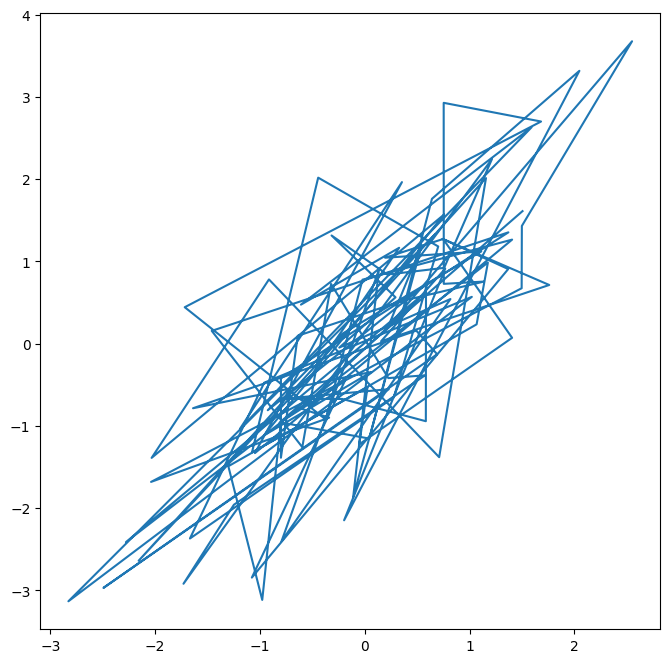

In [33]:
fig, ax = subplots(figsize=(8, 8))
x = rng.standard_normal(100)
y = x + rng.standard_normal(100)
ax.plot(x, y);

To create a scatterplot, we provide an additional argument to ```ax.plot()```, indicating that circles should be displayed...

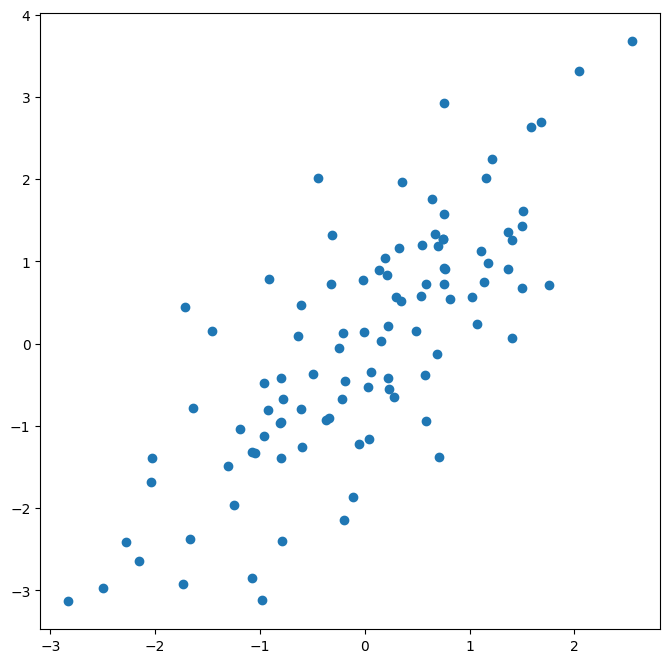

In [34]:
fig, ax = subplots(figsize=(8, 8))
ax.plot(x, y, 'o');

Alternatively, we could have used the ```ax.scatter()``` function to create a scatterplot...

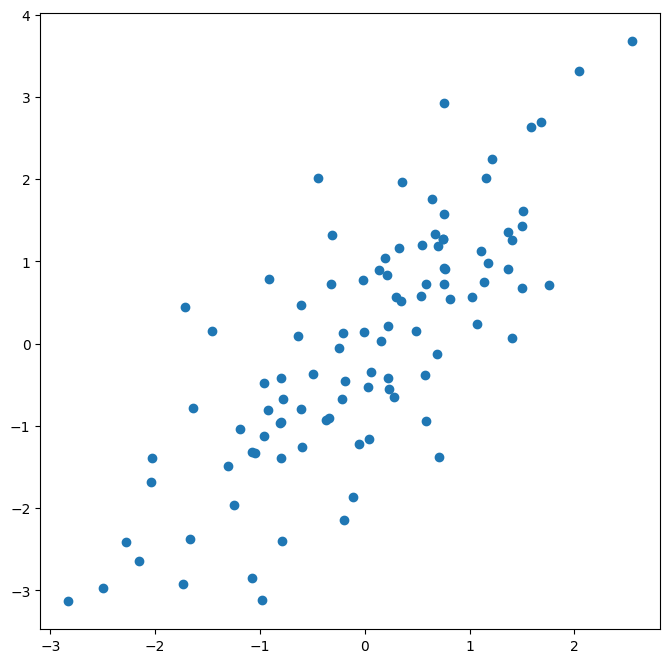

In [35]:
fig, ax = subplots(figsize=(8, 8))
ax.scatter(x, y, marker = 'o');

Observe how in the code blocks above, we ended the last line with a semicolon to prevent ```ax.plot(x, y)``` or ```ax.scatter(x, y)``` from printing text to the notebook.

An example of the text that precedes the printed plot...

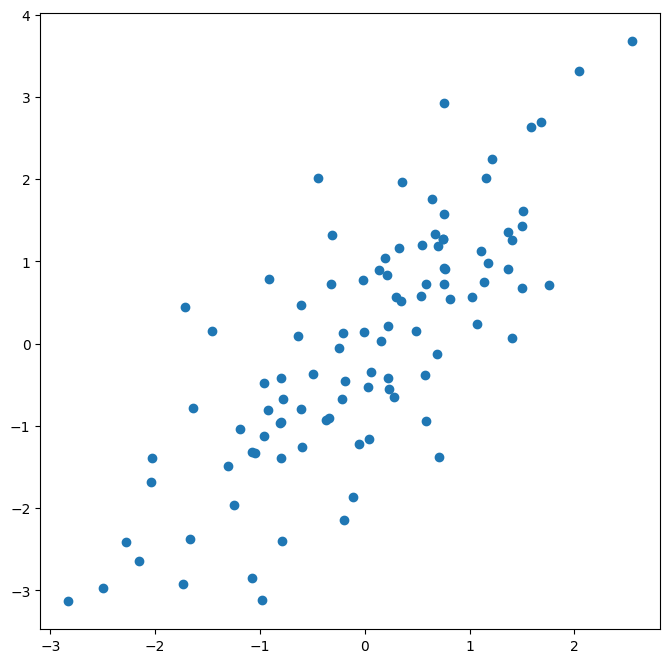

In [36]:
fig, ax = subplots(figsize=(8, 8))
ax.scatter(x, y, marker = 'o')

To label our plot, we can make use of the following methods for ```ax```: ```set_xlabel()```, ```set_ylabel()```, and ```set_title()```...

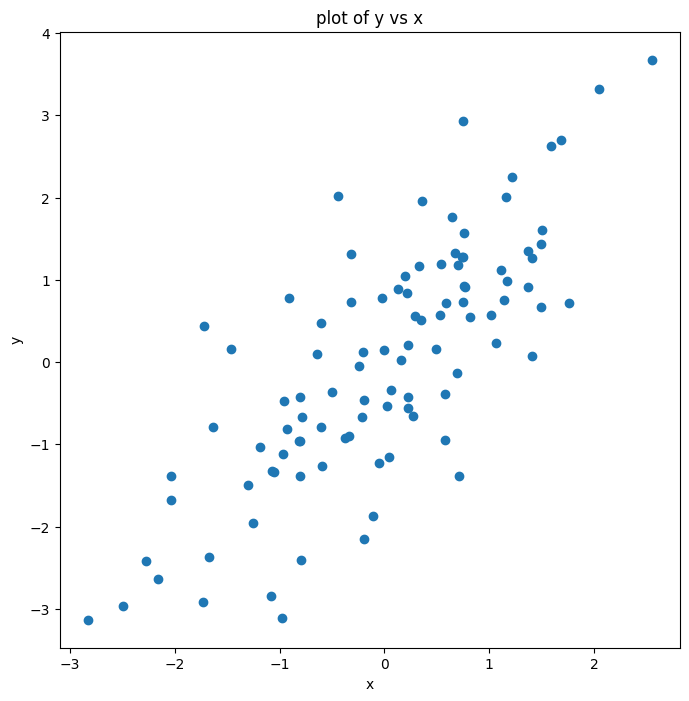

In [37]:
fig, ax = subplots(figsize=(8, 8))
ax.scatter(x, y, marker = 'o')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('plot of y vs x');

Having access to the figure object ```fig``` means we can change some aspects and redisplay it. In the following code, we change the size from $(8, 8)$ to $(12, 3)$...

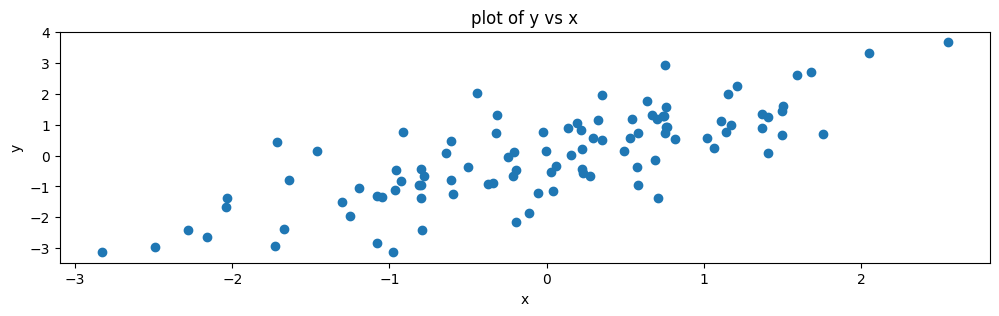

In [38]:
fig.set_size_inches(12, 3)
fig

We can also create several plots within one figure object. We do this by providing additional arguments to ```subplots()```. Below, we create a 2 x 3 grid of plots in a figure of size determine by the ```figsize``` argument. Sometimes, there is often a relationship between axes in the plots, e.g., all plots may have a common x-axis. If this is the case, the ```subplots()``` function can automatically handle this when passed the keyword argument ```sharex = True```. The ```axes``` object below is an array pointing to different plots in the figure.

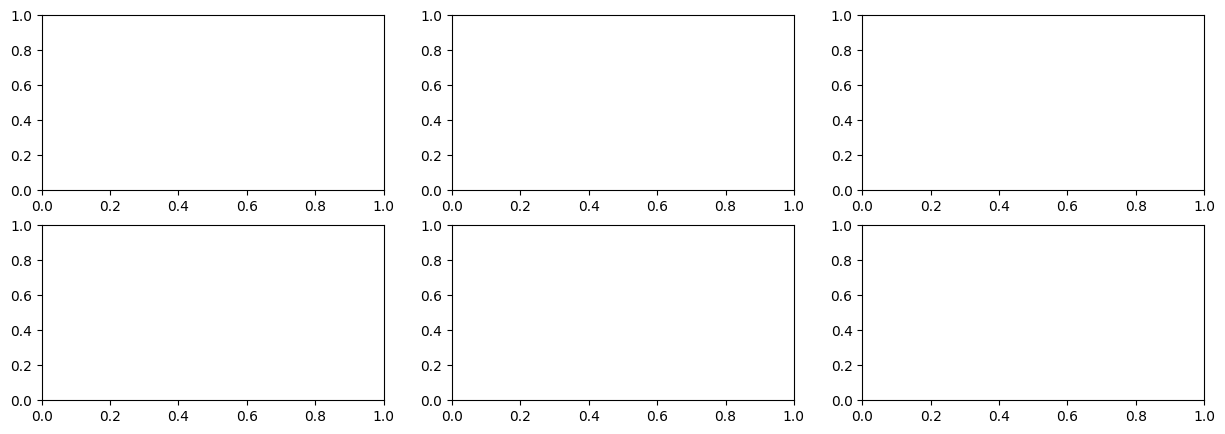

In [39]:
fig, axes = subplots(nrows = 2,
                     ncols = 3,
                     figsize = (15, 5)
)

We produce a scatterplot with ```'o'``` in the second column of the first row and a scatter plot with ```'+'``` in the third column of the second row...

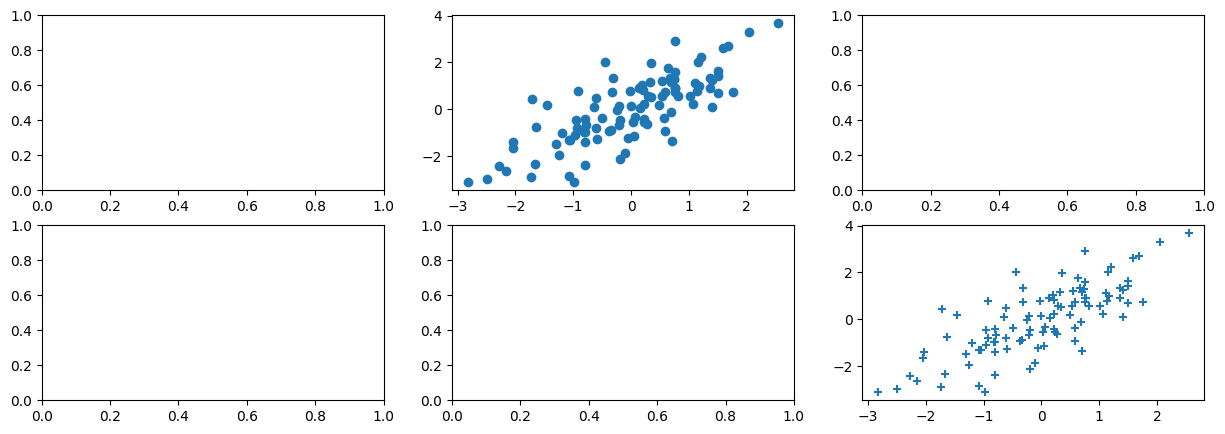

In [40]:
axes[0, 1].scatter(x, y, marker = 'o')
axes[1, 2].scatter(x, y, marker = '+')
fig

To save the output of ```fig```, we call its ```savefig()``` method. The argument ```dpi``` refers to dots per inch, used to determine how large the figure will be in pixels. Uncomment the following code block to see the saved images...

In [41]:
# fig.savefig("fig.png", dpi = 400)
# fig.savefig("fig.pdf", dpi = 200)

We can continue to modify fig using step-by-step updates. In the following code block, we modify the range of the x-axis, re-save the figure (commented out line), and even re-display it.

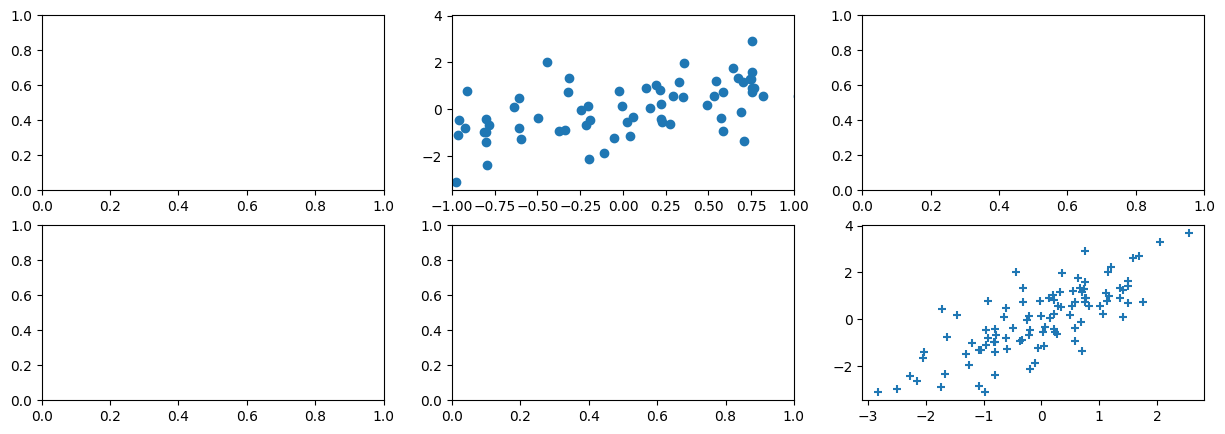

In [42]:
axes[0, 1].set_xlim([-1, 1])
# fig.savefig("fig_updated.jpg")
fig

###2D Plotting w/ the *seaborn* library

***Note: this section is not part of the txtbook***

The *seaborn* library is used for making statistical graphics, built on top of *matplotlib* and integrated closely with the *pandas* library's data structures.

We only need to import the *seaborn* library! Behind the scenes, *seaborn* uses *matplotlib* to draw its plots. For interactive work, it's recommended to use a Jupyter/IPython interface in *matplotlib* mode, or else we'll have to call ```matplotlib.pyplot.show()``` whenever we want to see the plot...

In [43]:
import seaborn as sns

We can choose how the matplotlib plots look using the ```sns.set_theme()``` function.

In [44]:
sns.set_theme?

Signature:
sns.set_theme(
    context='notebook',
    style='darkgrid',
    palette='deep',
    font='sans-serif',
    font_scale=1,
    color_codes=True,
    rc=None,
)
Docstring:
Set aspects of the visual theme for all matplotlib and seaborn plots.

This function changes the global defaults for all plots using the
matplotlib rcParams system. The themeing is decomposed into several distinct
sets of parameter values.

The options are illustrated in the :doc:`aesthetics <../tutorial/aesthetics>`
and :doc:`color palette <../tutorial/color_palettes>` tutorials.

Parameters
----------
context : string or dict
    Scaling parameters, see :func:`plotting_context`.
style : string or dict
    Axes style parameters, see :func:`axes_style`.
palette : string or sequence
    Color palette, see :func:`color_palette`.
font : string
    Font family, see matplotlib font manager.
font_scale : float, optional
    Separate scaling factor to independently scale the size of the
    font elements.
color_cod

In this case, we will apply the default theme, what is commonly referred to as the *matplotlib* rcParam  system.

In [45]:
sns.set_theme()

Most code in the documentation will use the ```sns.load_dataset()``` function to get quick access to an example dataset. There's nothing special about these datasets; they are just *pandas* dataframes, and we could have loaded them in using ```pandas.read_csv()``` or built them by hand. Typically, the *seaborn* library is very flexible about the data structures that it accepts.

In [46]:
sns.load_dataset?

Signature: sns.load_dataset(name, cache=True, data_home=None, **kws)
Docstring:
Load an example dataset from the online repository (requires internet).

This function provides quick access to a small number of example datasets
that are useful for documenting seaborn or generating reproducible examples
for bug reports. It is not necessary for normal usage.

Note that some of the datasets have a small amount of preprocessing applied
to define a proper ordering for categorical variables.

Use :func:`get_dataset_names` to see a list of available datasets.

Parameters
----------
name : str
    Name of the dataset (``{name}.csv`` on
    https://github.com/mwaskom/seaborn-data).
cache : boolean, optional
    If True, try to load from the local cache first, and save to the cache
    if a download is required.
data_home : string, optional
    The directory in which to cache data; see :func:`get_data_home`.
kws : keys and values, optional
    Additional keyword arguments are passed to passed thr

Here, we read in the ```tips``` example dataset...

In [47]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


We can use the ```sns.relplot()``` function to plot data. It is named that way because it is designed to visualize many different statistical relationships.

In [48]:
sns.relplot?

Signature:
sns.relplot(
    data=None,
    *,
    x=None,
    y=None,
    hue=None,
    size=None,
    style=None,
    units=None,
    weights=None,
    row=None,
    col=None,
    col_wrap=None,
    row_order=None,
    col_order=None,
    palette=None,
    hue_order=None,
    hue_norm=None,
    sizes=None,
    size_order=None,
    size_norm=None,
    markers=None,
    dashes=None,
    style_order=None,
    legend='auto',
    kind='scatter',
    height=5,
    aspect=1,
    facet_kws=None,
    **kwargs,
)
Docstring:
Figure-level interface for drawing relational plots onto a FacetGrid.

This function provides access to several different axes-level functions
that show the relationship between two variables with semantic mappings
of subsets. The `kind` parameter selects the underlying axes-level
function to use:

- :func:`scatterplot` (with `kind="scatter"`; the default)
- :func:`lineplot` (with `kind="line"`)

Extra keyword arguments are passed to the underlying function, so you
should re

The following plot shows the relationship between five variables in the ```tips``` dataset using a single call to the *seaborn* function ```sns.relplot()```. Notice how we only needed to provide the names of the variables and their roles in the plot. Unlike when using *matplotlib* directly, it wasn't necessary to specify attributes of the plot elements in terms of the color values or marker codes.

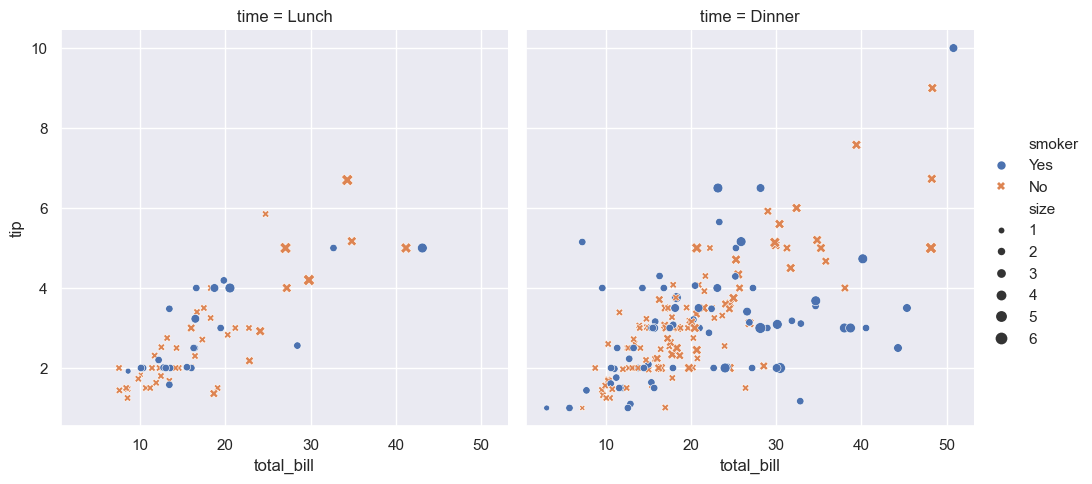

In [49]:
sns.relplot(data = tips,
            x = "total_bill", y = "tip", col = "time",
            hue = "smoker", style = "smoker", size = "size"
)

While scatter plots are often effective, relationships where one variable represents a measure of times are better represented by a line. The ```sns.relplot()``` function has a convenient ```kind``` parameter that lets you easily switch to this alternate representation....

As before, we load an example dataset provided to us by the *seaborn* library.

In [50]:
dots = sns.load_dataset("dots")
dots.head()

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487


Notice how the ```size``` and ```style``` parameters are used in both the scatter and line plots, but they affect the two visualizations differently: changing the marker area and symbol in the scatter plot vs the line width and dashing in the line plot. We did not need to keep those details in mind, letting us focus on the overall structure of the plot and the information we want to convey.

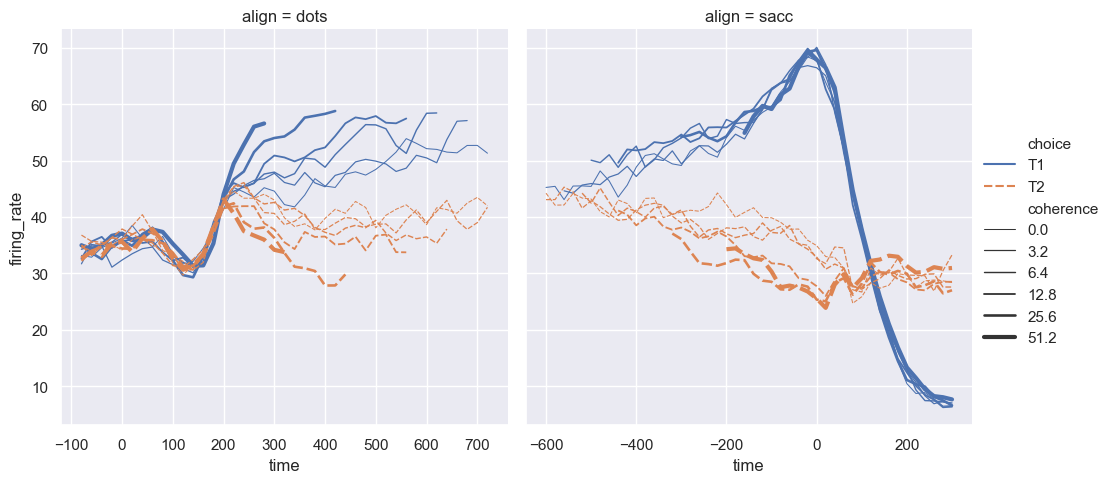

In [51]:
sns.relplot(
    data = dots, kind = "line",
    x = "time", y = "firing_rate", col = "align",
    hue = "choice", size = "coherence", style = "choice",
    facet_kws = dict(sharex = False)
)

Often, we are interested in the average value of one variable as a function of other variables. Many *seaborn* functions will automatically perform the statistical estimation that is necessary to answer these questions...

In [52]:
fmri = sns.load_dataset("fmri")
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


When statistical values are estimated, *seaborn* will use [bootstrapping](https://en.wikipedia.org/wiki/Bootstrapping_(statistics) to compute confidence intervals and draw error bars representing the uncertainty of the estimate. Bootstrapping is a procedure where the dataset is randomly resampled with replacement a number of times and the estimate is recalculated from each resample.

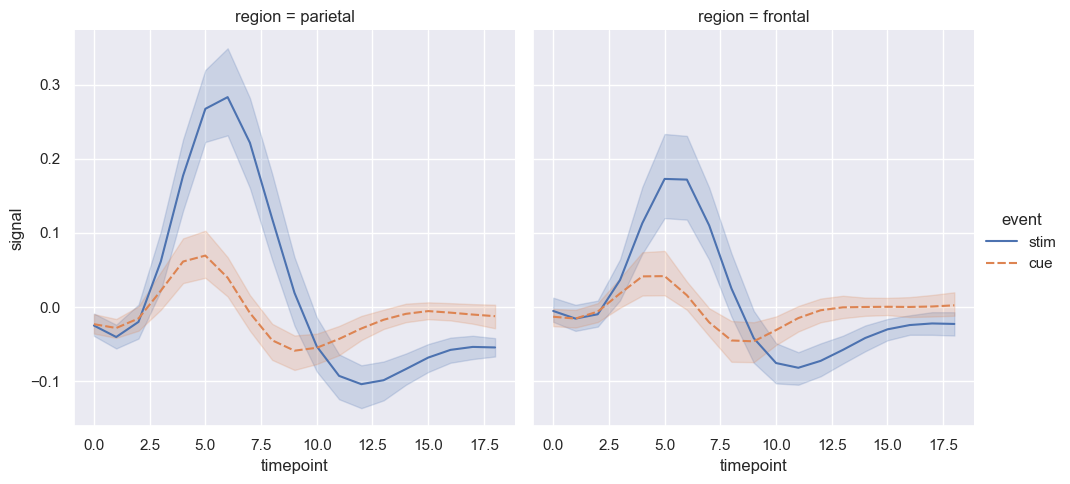

In [53]:
sns.relplot(
    data = fmri, kind = "line",
    x = "timepoint", y = "signal", col = "region",
    hue = "event", style = "event"
)

Statistical estimation in *seaborn* isn't just limited to descriptive statistics. For example, it is possible to enhance a scatterplot by including a linear regression model (and its uncertainty) using ```sns.lmplot()```...

In [54]:
sns.lmplot?

Signature:
sns.lmplot(
    data,
    *,
    x=None,
    y=None,
    hue=None,
    col=None,
    row=None,
    palette=None,
    col_wrap=None,
    height=5,
    aspect=1,
    markers='o',
    sharex=None,
    sharey=None,
    hue_order=None,
    col_order=None,
    row_order=None,
    legend=True,
    legend_out=None,
    x_estimator=None,
    x_bins=None,
    x_ci='ci',
    scatter=True,
    fit_reg=True,
    ci=95,
    n_boot=1000,
    units=None,
    seed=None,
    order=1,
    logistic=False,
    lowess=False,
    robust=False,
    logx=False,
    x_partial=None,
    y_partial=None,
    truncate=True,
    x_jitter=None,
    y_jitter=None,
    scatter_kws=None,
    line_kws=None,
    facet_kws=None,
)
Docstring:
Plot data and regression model fits across a FacetGrid.

This function combines :func:`regplot` and :class:`FacetGrid`. It is
intended as a convenient interface to fit regression models across
conditional subsets of a dataset.

When thinking about how to assign variables to 

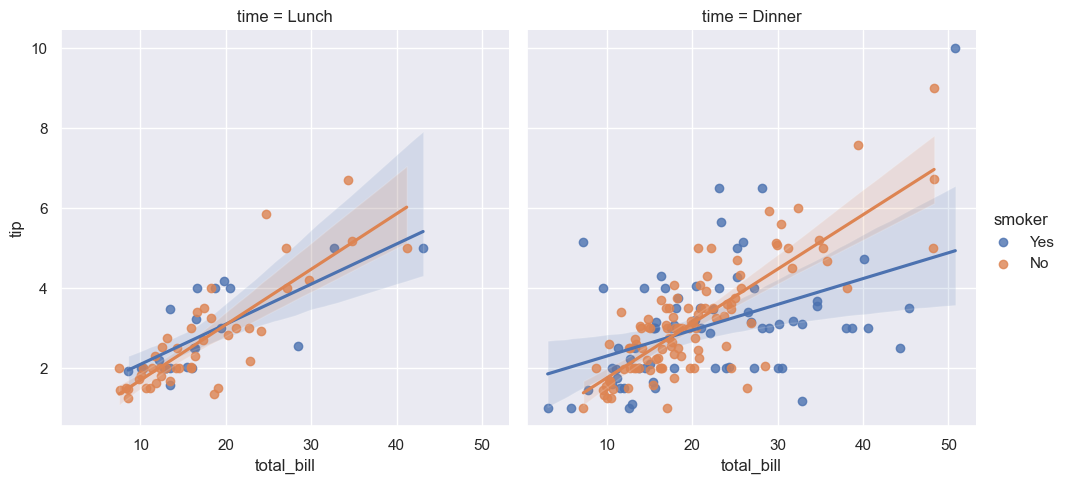

In [55]:
sns.lmplot(data = tips, x = "total_bill", y = "tip", col = "time", hue = "smoker")

The *seaborn* function ```sns.displot()``` supports several approaches to visualizing distributions

In [56]:
sns.displot?

Signature:
sns.displot(
    data=None,
    *,
    x=None,
    y=None,
    hue=None,
    row=None,
    col=None,
    weights=None,
    kind='hist',
    rug=False,
    rug_kws=None,
    log_scale=None,
    legend=True,
    palette=None,
    hue_order=None,
    hue_norm=None,
    color=None,
    col_wrap=None,
    row_order=None,
    col_order=None,
    height=5,
    aspect=1,
    facet_kws=None,
    **kwargs,
)
Docstring:
Figure-level interface for drawing distribution plots onto a FacetGrid.

This function provides access to several approaches for visualizing the
univariate or bivariate distribution of data, including subsets of data
defined by semantic mapping and faceting across multiple subplots. The
``kind`` parameter selects the approach to use:

- :func:`histplot` (with ``kind="hist"``; the default)
- :func:`kdeplot` (with ``kind="kde"``)
- :func:`ecdfplot` (with ``kind="ecdf"``; univariate-only)

Additionally, a :func:`rugplot` can be added to any kind of plot to show
individual 

This includes classic techniques like histograms and computationally-intensive approaches like [kernel density estimation](https://mathisonian.github.io/kde/), i.e., a non-parametric method to estimate the probability density function of a random variable based on kernels as weights...

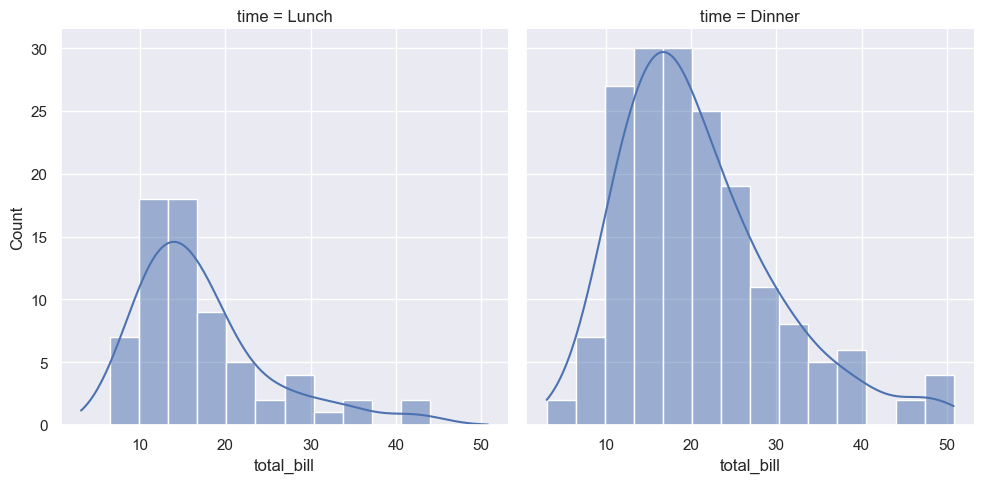

In [57]:
sns.displot(data = tips, x = "total_bill", col = "time", kde = True)

The *seaborn* library also promotes techniques that are powerful but less familiar, such as calculating and plotting the empirical cumulative distribution function of the data...

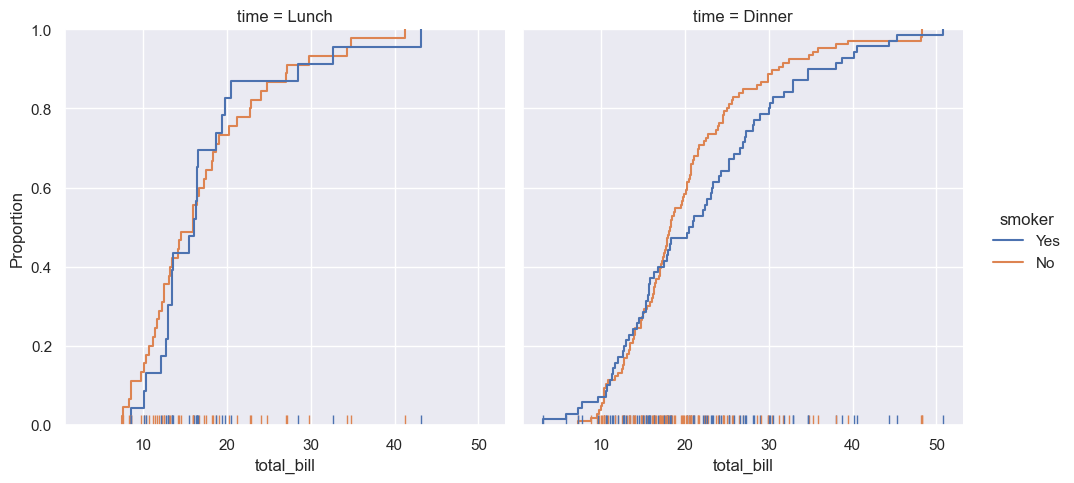

In [58]:
sns.displot(data = tips, kind = "ecdf",
            x = "total_bill", col = "time", hue = "smoker", rug = True
)

Several specialize plot types exist in the *seaborn* library are oriented towards visualizing categorical data. They can be accessed through ```sns.catplot()```.

In [59]:
sns.catplot?

Signature:
sns.catplot(
    data=None,
    *,
    x=None,
    y=None,
    hue=None,
    row=None,
    col=None,
    kind='strip',
    estimator='mean',
    errorbar=('ci', 95),
    n_boot=1000,
    seed=None,
    units=None,
    weights=None,
    order=None,
    hue_order=None,
    row_order=None,
    col_order=None,
    col_wrap=None,
    height=5,
    aspect=1,
    log_scale=None,
    native_scale=False,
    formatter=None,
    orient=None,
    color=None,
    palette=None,
    hue_norm=None,
    legend='auto',
    legend_out=True,
    sharex=True,
    sharey=True,
    margin_titles=False,
    facet_kws=None,
    ci=<deprecated>,
    **kwargs,
)
Docstring:
Figure-level interface for drawing categorical plots onto a FacetGrid.

This function provides access to several axes-level functions that
show the relationship between a numerical and one or more categorical
variables using one of several visual representations. The `kind`
parameter selects the underlying axes-level function to us

These plots offer differing levels of granularity. At the finest level, you may wish to see every observation by drawing a "swarm" plot, a scatter plot that adjusts the positions of the points along the categorical axis so they don't overlap...

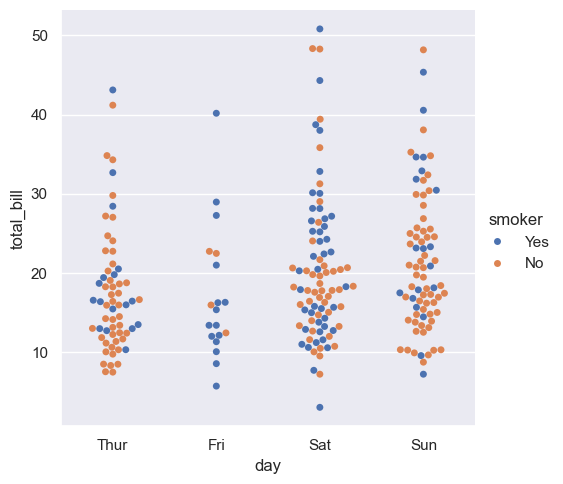

In [60]:
sns.catplot(data = tips, kind = "swarm", x = "day", y = "total_bill", hue = "smoker")

Alternatively, you could use kernel density estimation to represent the underlying distribution that the points are sampled from...

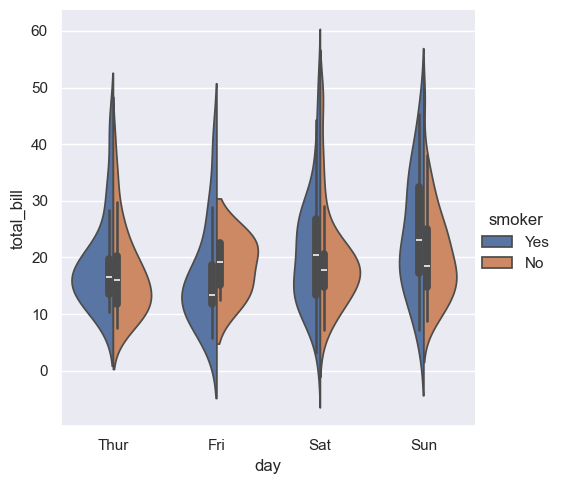

In [61]:
sns.catplot(data = tips, kind = "violin",
            x = "day", y = "total_bill", hue = "smoker", split = True
)

Or you could show only the mean value and its confidence interval within each nested category...

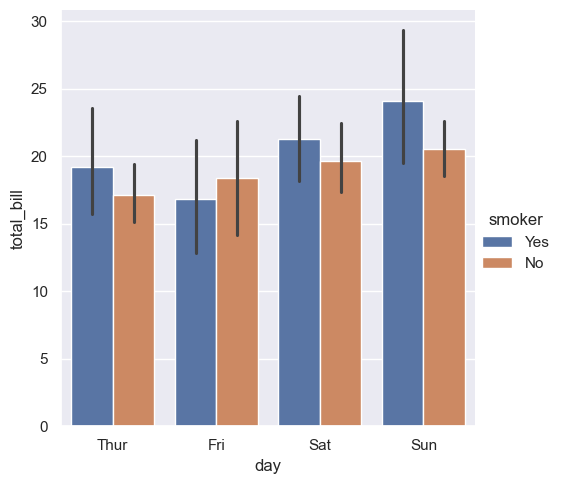

In [62]:
sns.catplot(data = tips, kind = "bar", x = "day", y = "total_bill", hue = "smoker")

Some *seaborn* functions combine multiple kinds of plots to quickly give informative summaries of a dataset. One, ```sns.joinplot()```, focuses on a single relationship. It plots the joint distribution between two variables along with each variable's marginal distribution...

In [63]:
sns.jointplot?

Signature:
sns.jointplot(
    data=None,
    *,
    x=None,
    y=None,
    hue=None,
    kind='scatter',
    height=6,
    ratio=5,
    space=0.2,
    dropna=False,
    xlim=None,
    ylim=None,
    color=None,
    palette=None,
    hue_order=None,
    hue_norm=None,
    marginal_ticks=False,
    joint_kws=None,
    marginal_kws=None,
    **kwargs,
)
Docstring:
Draw a plot of two variables with bivariate and univariate graphs.

This function provides a convenient interface to the :class:`JointGrid`
class, with several canned plot kinds. This is intended to be a fairly
lightweight wrapper; if you need more flexibility, you should use
:class:`JointGrid` directly.

Parameters
----------
data : :class:`pandas.DataFrame`, :class:`numpy.ndarray`, mapping, or sequence
    Input data structure. Either a long-form collection of vectors that can be
    assigned to named variables or a wide-form dataset that will be internally
    reshaped.
x, y : vectors or keys in ``data``
    Variables that s

In the following dataset, we have the data related to three species of penguins on an island...

In [64]:
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


Using ```sns.joinplot()```, we can inspect each bill length measurement of the species in one plot...

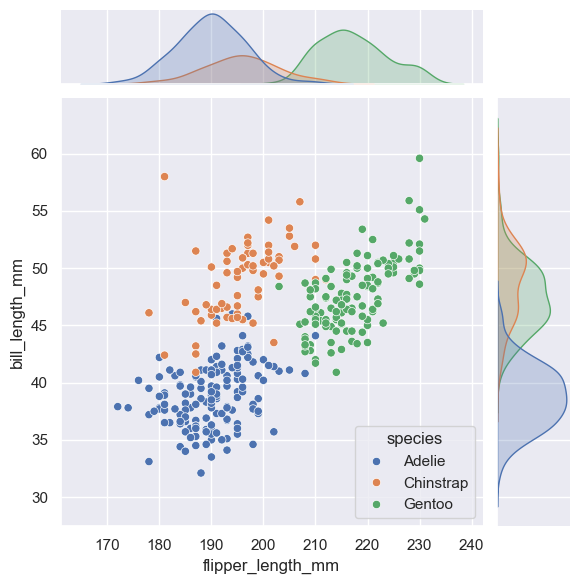

In [65]:
sns.jointplot(data = penguins, x = "flipper_length_mm", y = "bill_length_mm",
              hue = "species"
)

Using ```sns.pairplot()```, we can take a broader view by showing joint and marginal distributions for all pairwise relationships and for each variable, respectively....

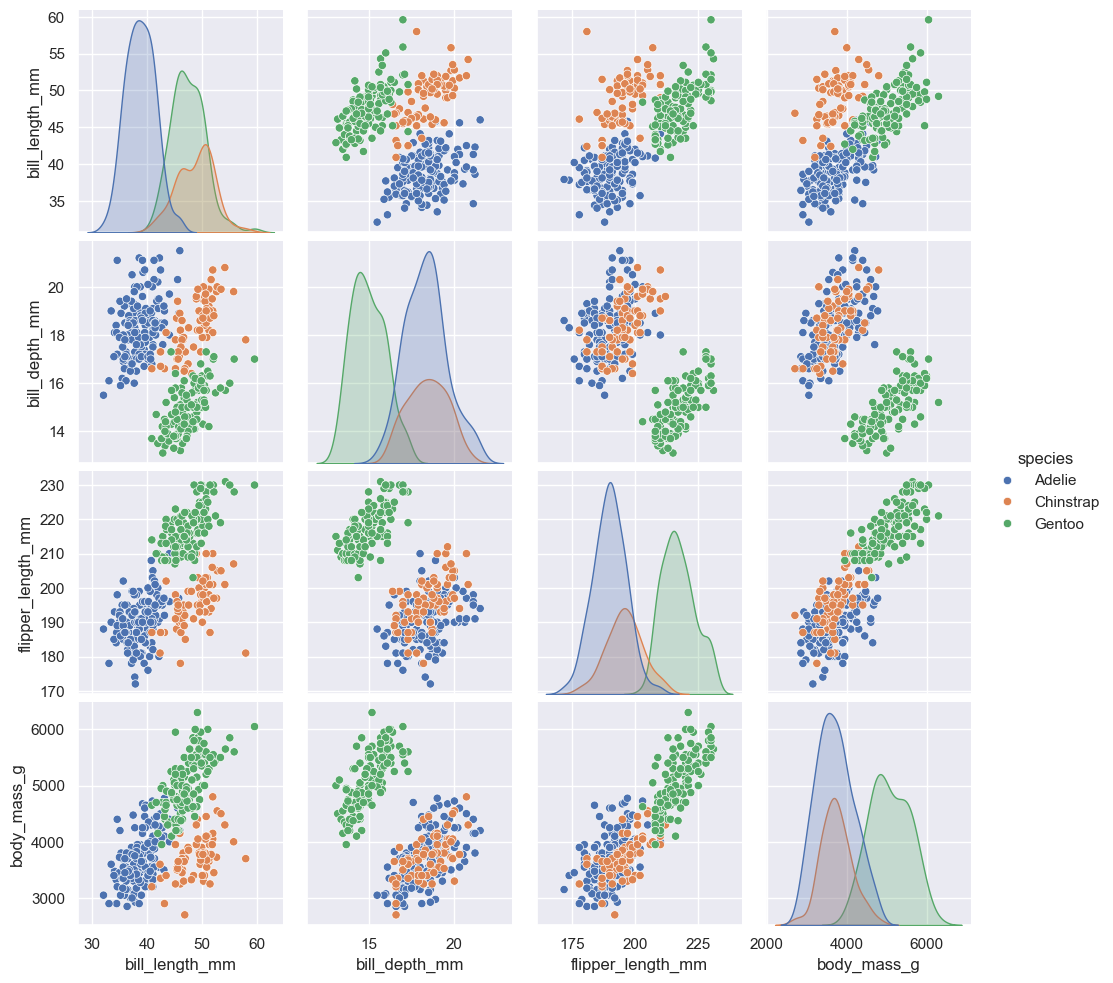

In [66]:
sns.pairplot(data = penguins, hue = "species")

We can also utilize lower-level tools for building figures. These tools work by combining axes-level plotting functions with objects that manage the layout of the figure, linking the sructure of a dataset to a grid of axes. Both elements are part of the public API and you can use them directly to create complex figures with only a few more lines of code.

We begin with the ```sns.PairGrid()``` function which creates a subplot grid for plotting pairwise relationships in a dataset...

In [67]:
sns.PairGrid?

Init signature:
sns.PairGrid(
    data,
    *,
    hue=None,
    vars=None,
    x_vars=None,
    y_vars=None,
    hue_order=None,
    palette=None,
    hue_kws=None,
    corner=False,
    diag_sharey=True,
    height=2.5,
    aspect=1,
    layout_pad=0.5,
    despine=True,
    dropna=False,
)
Docstring:     
Subplot grid for plotting pairwise relationships in a dataset.

This object maps each variable in a dataset onto a column and row in a
grid of multiple axes. Different axes-level plotting functions can be
used to draw bivariate plots in the upper and lower triangles, and the
marginal distribution of each variable can be shown on the diagonal.

Several different common plots can be generated in a single line using
:func:`pairplot`. Use :class:`PairGrid` when you need more flexibility.

See the :ref:`tutorial <grid_tutorial>` for more information.
Init docstring:
Initialize the plot figure and PairGrid object.

Parameters
----------
data : DataFrame
    Tidy (long-form) dataframe whe

Here, we create a "corner" plot that is grouped color-wise by species and only shows the lower triangle of the grid...

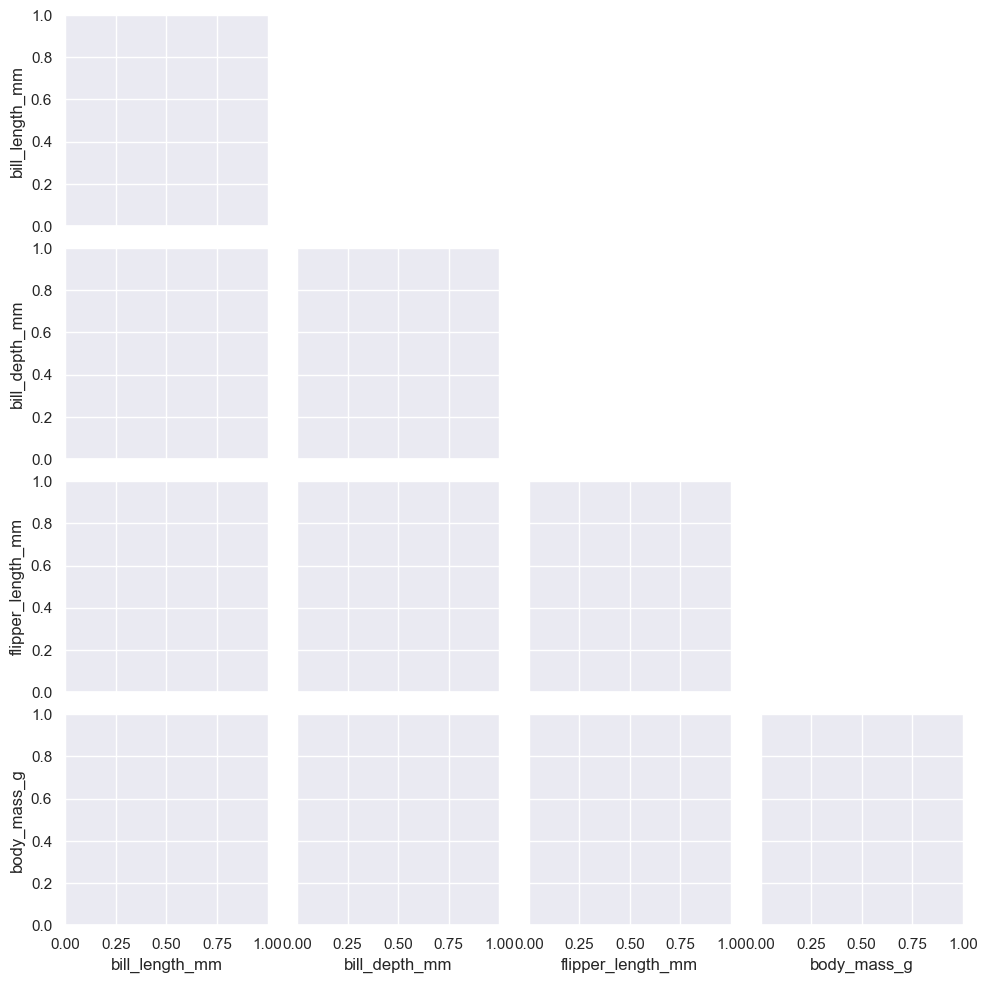

In [68]:
corner_plot = sns.PairGrid(penguins, hue = "species", corner = True)

Using ```corner_plot.map_lower()```, we can plot on the lower diagonal subplots.

In [69]:
corner_plot.map_lower?

Signature: corner_plot.map_lower(func, **kwargs)
Docstring:
Plot with a bivariate function on the lower diagonal subplots.

Parameters
----------
func : callable plotting function
    Must take x, y arrays as positional arguments and draw onto the
    "currently active" matplotlib Axes. Also needs to accept kwargs
    called ``color`` and  ``label``.
File:      ~/Library/Python/3.12/lib/python/site-packages/seaborn/axisgrid.py
Type:      method

We will add kernel density estimation (KDE) plots to the lower triangle that sets the number of contour lines to five...

In [70]:
corner_plot.map_lower(sns.kdeplot, hue = None, levels = 5, color = ".2")

We then overlay scatter plots on the lower triangle with the '+' marker for each point...

In [71]:
corner_plot.map_lower(sns.scatterplot, marker = "+")

Using ```corner_plot.map_diag()```, we can plot subplots on the diagonal.

In [72]:
corner_plot.map_diag?

Signature: corner_plot.map_diag(func, **kwargs)
Docstring:
Plot with a univariate function on each diagonal subplot.

Parameters
----------
func : callable plotting function
    Must take an x array as a positional argument and draw onto the
    "currently active" matplotlib Axes. Also needs to accept kwargs
    called ``color`` and  ``label``.
File:      ~/Library/Python/3.12/lib/python/site-packages/seaborn/axisgrid.py
Type:      method

We add step-style histograms to the diagonal which display their respective KDE curves...

In [73]:
corner_plot.map_diag(sns.histplot, element = "step", linewidth = 0, kde = True)

Using ```corner_plot.add_legend()```, we can add a legend to the plot.

In [74]:
corner_plot.add_legend?

Signature:
corner_plot.add_legend(
    legend_data=None,
    title=None,
    label_order=None,
    adjust_subtitles=False,
    **kwargs,
)
Docstring:
Draw a legend, maybe placing it outside axes and resizing the figure.

Parameters
----------
legend_data : dict
    Dictionary mapping label names (or two-element tuples where the
    second element is a label name) to matplotlib artist handles. The
    default reads from ``self._legend_data``.
title : string
    Title for the legend. The default reads from ``self._hue_var``.
label_order : list of labels
    The order that the legend entries should appear in. The default
    reads from ``self.hue_names``.
adjust_subtitles : bool
    If True, modify entries with invisible artists to left-align
    the labels and set the font size to that of a title.
kwargs : key, value pairings
    Other keyword arguments are passed to the underlying legend methods
    on the Figure or Axes object.

Returns
-------
self : Grid instance
    Returns self for

In [75]:
corner_plot.add_legend(frameon = True)

We can then use ```corner_plot.legend.set_bbox_to_anchor()``` to adjust the position of the legend.

In [76]:
corner_plot.legend.set_bbox_to_anchor?

Signature: corner_plot.legend.set_bbox_to_anchor(bbox, transform=None)
Docstring:
Set the bbox that the legend will be anchored to.

Parameters
----------
bbox : `~matplotlib.transforms.BboxBase` or tuple
    The bounding box can be specified in the following ways:

    - A `.BboxBase` instance
    - A tuple of ``(left, bottom, width, height)`` in the given
      transform (normalized axes coordinate if None)
    - A tuple of ``(left, bottom)`` where the width and height will be
      assumed to be zero.
    - *None*, to remove the bbox anchoring, and use the parent bbox.

transform : `~matplotlib.transforms.Transform`, optional
    A transform to apply to the bounding box. If not specified, this
    will use a transform to the bounding box of the parent.
File:      ~/Library/Python/3.12/lib/python/site-packages/matplotlib/legend.py
Type:      method

Altogether, the finished custom plot will look like this when we put all the code together...

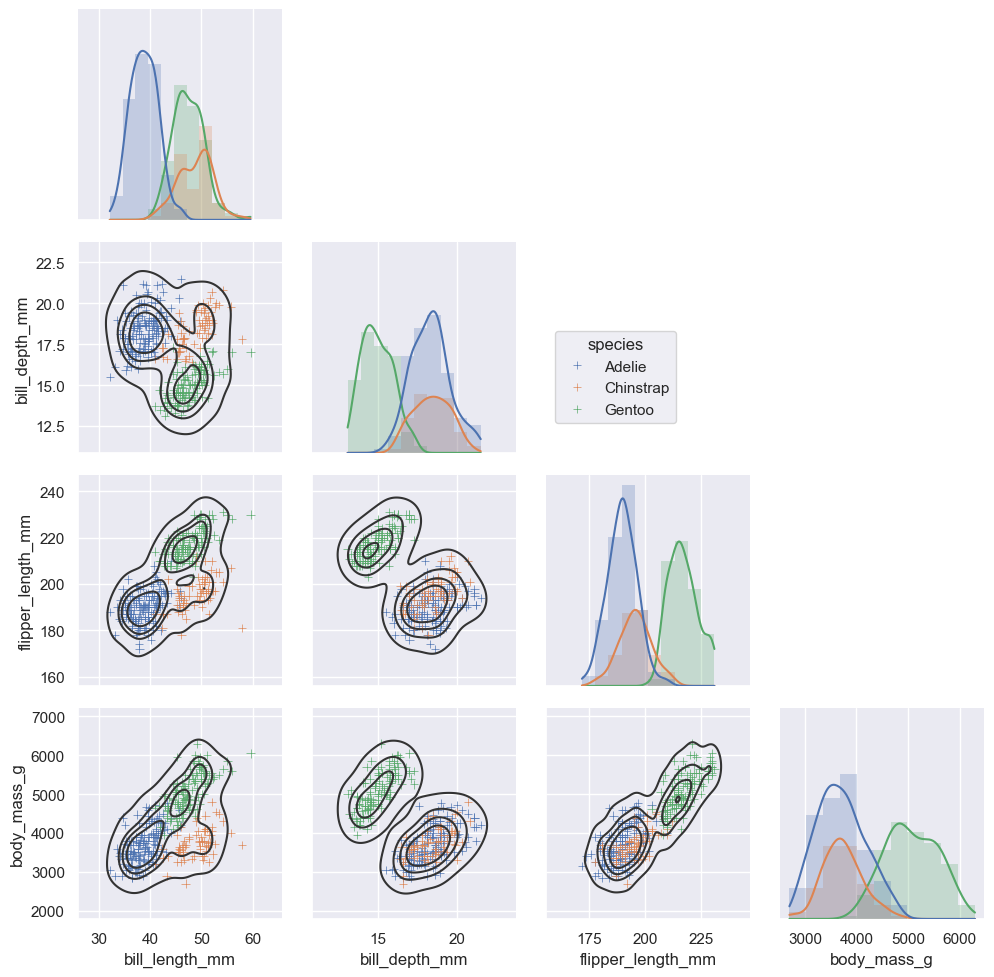

In [77]:
corner_plot = sns.PairGrid(penguins, hue="species", corner=True)

corner_plot.map_lower(sns.kdeplot, hue=None, levels=5, color=".2")
corner_plot.map_lower(sns.scatterplot, marker="+")

corner_plot.map_diag(sns.histplot, element="step", linewidth=0, kde=True)

corner_plot.add_legend(frameon=True)
corner_plot.legend.set_bbox_to_anchor((.61, .6))

The *seaborn* library creates complete graphics with a single function call: when possible, its functions will automatically add informative axis labels and legends that explain the semantic mappings in the plot.

In many cases, the *seaborn* library will also choose default values for its parameters based on the characteristics of the data. For example, the color mappings that we have seen so far used distinct hues (blue, orange, and sometimes green) to represent different levels of the categorical variables assigned to ```hue```. When mapping a numeric variable, some functions will switch to a continuous gradient.

We can show this by plotting the ```penguins``` dataset, more specifically the bill length and bill depth. We will group these measurements by body mass...

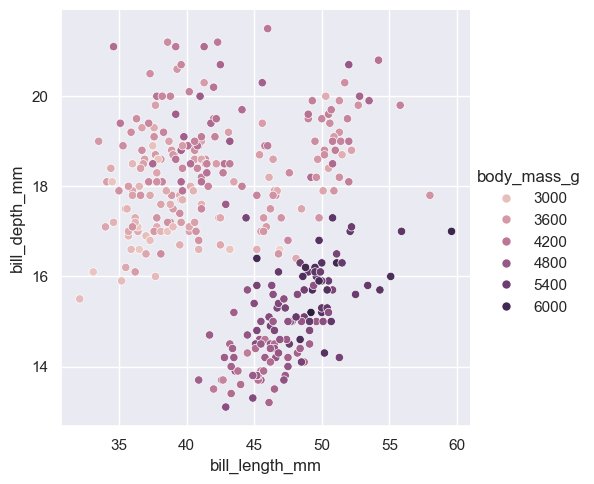

In [78]:
sns.relplot(
    data = penguins,
    x = "bill_length_mm", y = "bill_depth_mm",
    hue = "body_mass_g"
)

For publishing work, the *seaborn* library allows for several levels of customization. It defines built-in themes that apply to all figures, its functions have standardized parameters that can modify the semantic mappings for each plot, and additional keyword arguments are passed down to the underlying *matplotlib* artists, allowing even more control.

We can fine-tune the customizations for the previous plot we created...

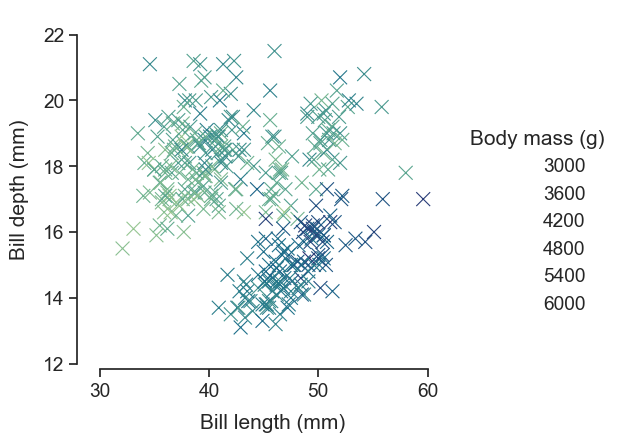

In [79]:
sns.set_theme(style = "ticks", font_scale = 1.25)
p = sns.relplot(
    data = penguins,
    x = "bill_length_mm", y = "bill_depth_mm", hue = "body_mass_g",
    palette = "crest", marker = "x", s = 100
)
p.set_axis_labels("Bill length (mm)", "Bill depth (mm)", labelpad = 10)
p.legend.set_title("Body mass (g)")
p.figure.set_size_inches((6.5, 4.5))
p.ax.margins(.15)
p.despine(trim = True)

###3D Plotting (w/ just *matplotlib*)

The ```ax.contour()``` method produces a contour plot in order to represent three-dimensional data, similar to a topographical map.

It takes three arguments:
1. A vector of `x` values (the first dimension),
2. A vector of `y` values (the second dimension),
   and
3. A matrix whose elements correspond to the ```z``` value (the third dimension) for each pair of ```(x, y)``` coordinates.

In [80]:
plt.contour?

Object `plt.contour` not found.


To create ```x``` and ```y```, we'll use the ```np.linspace(<start>, <end>, <length>)```...

In [81]:
x = np.linspace(-np.pi, np.pi, 50)
y = x
f = np.multiply.outer(np.cos(y), 1 / (1 + x**2))
f

array([[-0.09199967, -0.09920276, -0.10724999, ..., -0.10724999,
        -0.09920276, -0.09199967],
       [-0.09124435, -0.0983883 , -0.10636947, ..., -0.10636947,
        -0.0983883 , -0.09124435],
       [-0.08899081, -0.09595832, -0.10374236, ..., -0.10374236,
        -0.09595832, -0.08899081],
       ...,
       [-0.08899081, -0.09595832, -0.10374236, ..., -0.10374236,
        -0.09595832, -0.08899081],
       [-0.09124435, -0.0983883 , -0.10636947, ..., -0.10636947,
        -0.0983883 , -0.09124435],
       [-0.09199967, -0.09920276, -0.10724999, ..., -0.10724999,
        -0.09920276, -0.09199967]])

Now, we plot ```x```, ```y```, and ```f```...

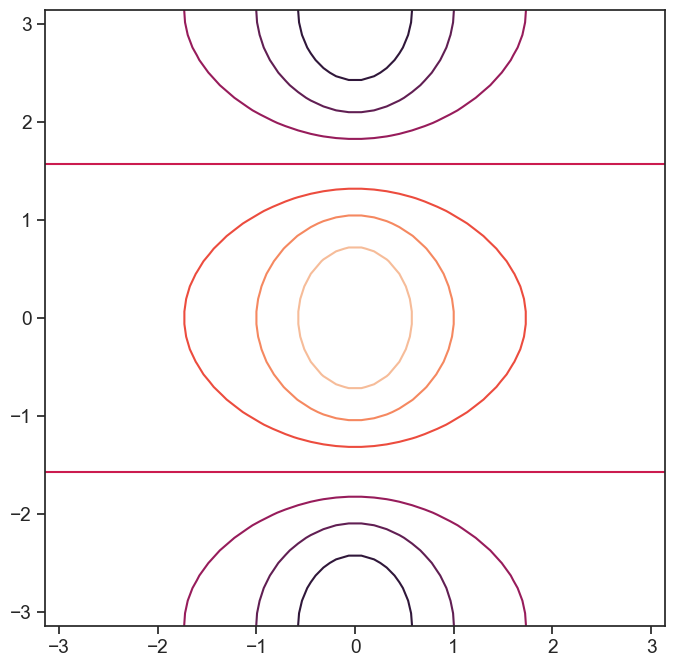

In [82]:
fig, ax = subplots(figsize = (8, 8))
ax.contour(x, y, f);

We can increase the resolution by adding more levels to the image...

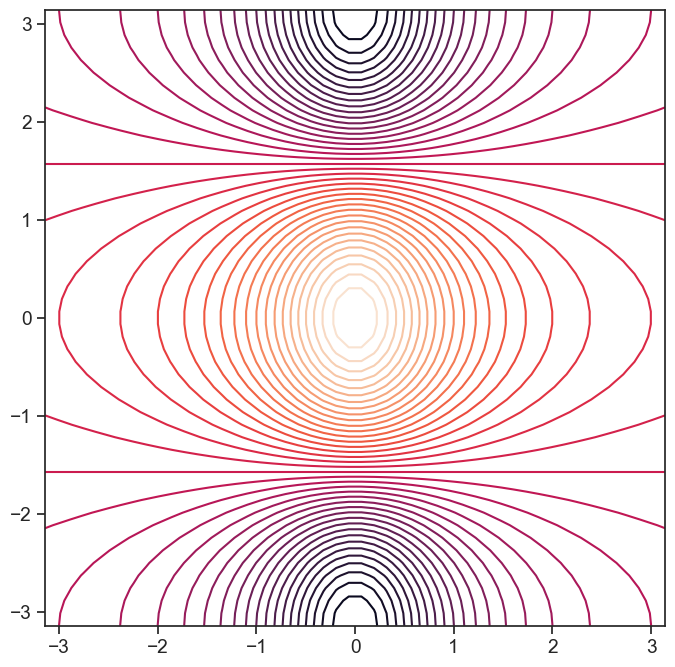

In [83]:
fig, ax = subplots(figsize = (8, 8))
ax.contour(x, y, f, levels = 45);

Let's add more...

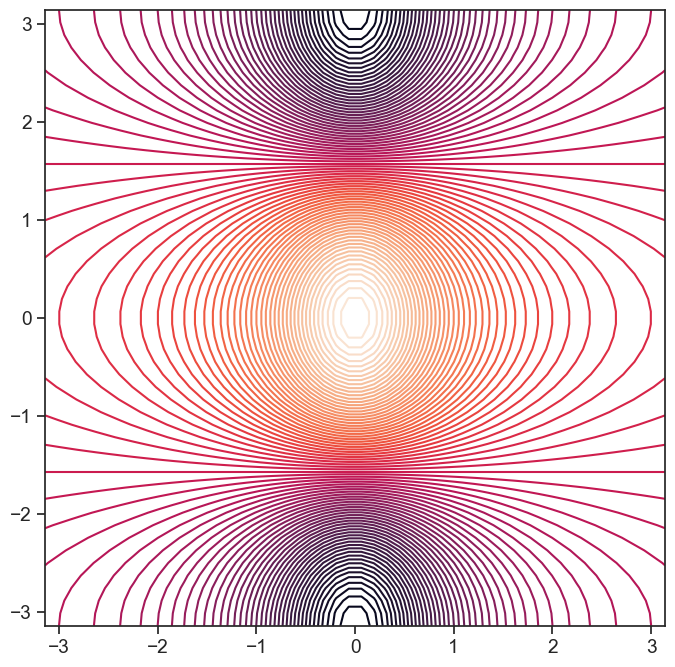

In [84]:
fig, ax = subplots(figsize = (8, 8))
ax.contour(x, y, f, levels = 90);

The ```ax.imshow()``` method is similar to ```ax.contour()```, except that it produces a color-coded plot whose colors depend on the ```z``` value. This is known as a heatmap and is sometimes used to plot temperature in weather forecasts.

In [85]:
ax.imshow?

Signature:
ax.imshow(
    X,
    cmap=None,
    norm=None,
    *,
    aspect=None,
    interpolation=None,
    alpha=None,
    vmin=None,
    vmax=None,
    origin=None,
    extent=None,
    interpolation_stage=None,
    filternorm=True,
    filterrad=4.0,
    resample=None,
    url=None,
    data=None,
    **kwargs,
)
Docstring:
Display data as an image, i.e., on a 2D regular raster.

The input may either be actual RGB(A) data, or 2D scalar data, which
will be rendered as a pseudocolor image. For displaying a grayscale
image, set up the colormapping using the parameters
``cmap='gray', vmin=0, vmax=255``.

The number of pixels used to render an image is set by the Axes size
and the figure *dpi*. This can lead to aliasing artifacts when
the image is resampled, because the displayed image size will usually
not match the size of *X* (see
:doc:`/gallery/images_contours_and_fields/image_antialiasing`).
The resampling can be controlled via the *interpolation* parameter
and/or :rc:`image.inte

We will now plug in ```x```, ```y```, and ```f``` into ```ax.imshow()```...

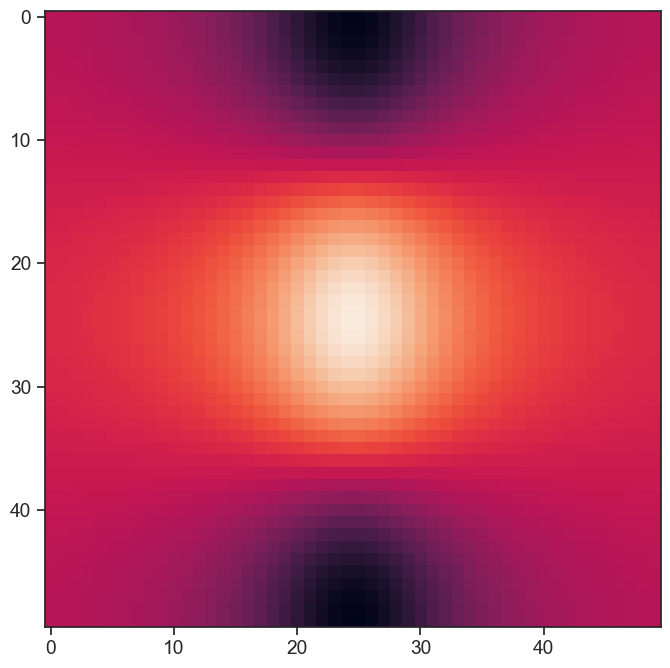

In [86]:
fig, ax = subplots(figsize = (8, 8))
ax.imshow(f);

##Sequences and Slice Notation

As we saw previously, ```np.linspace()``` can be used to create a sequence of numbers...

In [87]:
seq = np.linspace(0, 1, 11)
seq

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

The function ```np.arange()``` returns a sequence of numbers spaced out by ```step```. If ```step``` isn't specified, then a default value of 1 is used. Let's create a sequence that starts at 0 and ends at 10...

In [88]:
seq = np.arange(0, 10)
seq

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

The value 10 doesn't appear in the list due to the slice notation in Python. Slice notation is used to index sequences such as lists, tuples, and arrays. We can obtain the fourth through sixt (inclusive) entries of a string using the indexing notation ```[3:6]```...

In [89]:
"hello world"[3:6]

'lo '

We could have also used the following notation...

In [90]:
"hello world"[slice(3, 6)]

'lo '

##Indexing Data

We begin by creating a two-dimensional *numpy* array...

In [91]:
A = np.array(np.arange(16)).reshape((4, 4))
A

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

Typing ```A[1, 2]``` retrieves the element corresponding to the second row and third column, due to zero-indexing...

In [92]:
A[1, 2]

np.int64(6)

###Indexing Rows Columns, and Submatrices

We can select multiple rows at the same time. For example, ```[1, 3]``` will retrieve the second and fourth rows...

In [93]:
A[[1, 3]]

array([[ 4,  5,  6,  7],
       [12, 13, 14, 15]])

To select the first and third columns, we pass in ```[0, 2]``` as the second argument in the square brackets. In this case we need to supply the first argument ```:``` which selects all rows...

In [94]:
A[:, [0, 2]]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10],
       [12, 14]])

Let's try selecting the submatrix consisting of the second and fourth rows as well as the first and third columns...

In [95]:
A[[1, 3], [0, 2]]

array([ 4, 14])

That wasn't what we were supposed to get :( We got a one-dimensional array of length two identical to...

In [96]:
np.array([A[1, 0], A[3, 2]])

array([ 4, 14])

The *numpy* interpretation is that we are providing pairs of i, j indices for a series of entries. In order to capture a submatrix, we can first create a submatrix by subsetting the rows of ```A``` and then further subsetting ```A``` by columns...

In [97]:
A[[1, 3]][:, [0, 2]]

array([[ 4,  6],
       [12, 14]])

There are more efficient ways to achieve the same result. The convenience function ```np._ix()``` allows us to extract a submatrix using lists, by creating an intermediate mesh object...

In [98]:
np.ix_?

Signature:       np.ix_(*args)
Call signature:  np.ix_(*args, **kwargs)
Type:            _ArrayFunctionDispatcher
String form:     <function ix_ at 0x109366d40>
File:            /opt/homebrew/lib/python3.12/site-packages/numpy/lib/_index_tricks_impl.py
Docstring:      
Construct an open mesh from multiple sequences.

This function takes N 1-D sequences and returns N outputs with N
dimensions each, such that the shape is 1 in all but one dimension
and the dimension with the non-unit shape value cycles through all
N dimensions.

Using `ix_` one can quickly construct index arrays that will index
the cross product. ``a[np.ix_([1,3],[2,5])]`` returns the array
``[[a[1,2] a[1,5]], [a[3,2] a[3,5]]]``.

Parameters
----------
args : 1-D sequences
    Each sequence should be of integer or boolean type.
    Boolean sequences will be interpreted as boolean masks for the
    corresponding dimension (equivalent to passing in
    ``np.nonzero(boolean_sequence)``).

Returns
-------
out : tuple of ndar

In [99]:
mesh_idx = np.ix_([1, 3], [0, 2])
mesh_idx

(array([[1],
        [3]]),
 array([[0, 2]]))

This intermediate ```mesh``` object can be used for indexing...

In [100]:
A[mesh_idx]

array([[ 4,  6],
       [12, 14]])

Alternatively, we can subset matrices efficiently using slices. The slice ```1:4:2``` captures the second and fourth items of a sequence, while the slice ```0:3:2``` captures the first and third items...

In [101]:
A[1:4:2, 0:3:2]

array([[ 4,  6],
       [12, 14]])

We can retrieve a submatrix directly using slices and not by lists because *numpy* treats these different Python types differently (seems a little obvious when explained this way).

###Boolean Indexing

In *numpy*, a Boolean is a type that equals either ```True``` or ```False```, which can be represented as 1 or 0, respectively. We create a vector of 0's represented as Booleans, of length equal to the first dimension of ```A```...

In [102]:
keep_rows = np.zeros(A.shape[0], bool)
keep_rows

array([False, False, False, False])

We now set two of the elements to True...

In [103]:
keep_rows[[1,3]] = True
keep_rows

array([False,  True, False,  True])

We can use the ```np.all()``` function to observe that ```keep_rows``` is equivalent to ```np.array([0, 1, 0, 1])```...

In [104]:
np.all(keep_rows == np.array([0, 1, 0, 1]))

np.True_

The ```np.all()``` function checked whether all entries of an array are ```True```.

In [105]:
np.all?

Signature:       np.all(a, axis=None, out=None, keepdims=<no value>, *, where=<no value>)
Call signature:  np.all(*args, **kwargs)
Type:            _ArrayFunctionDispatcher
String form:     <function all at 0x105ccca40>
File:            /opt/homebrew/lib/python3.12/site-packages/numpy/_core/fromnumeric.py
Docstring:      
Test whether all array elements along a given axis evaluate to True.

Parameters
----------
a : array_like
    Input array or object that can be converted to an array.
axis : None or int or tuple of ints, optional
    Axis or axes along which a logical AND reduction is performed.
    The default (``axis=None``) is to perform a logical AND over all
    the dimensions of the input array. `axis` may be negative, in
    which case it counts from the last to the first axis.

    .. versionadded:: 1.7.0

    If this is a tuple of ints, a reduction is performed on multiple
    axes, instead of a single axis or all the axes as before.
out : ndarray, optional
    Alternate out

The ```np.any()``` function can be used to check whether any entries of an array are ```True```.

In [106]:
np.any?

Signature:       np.any(a, axis=None, out=None, keepdims=<no value>, *, where=<no value>)
Call signature:  np.any(*args, **kwargs)
Type:            _ArrayFunctionDispatcher
String form:     <function any at 0x105ccc900>
File:            /opt/homebrew/lib/python3.12/site-packages/numpy/_core/fromnumeric.py
Docstring:      
Test whether any array element along a given axis evaluates to True.

Returns single boolean if `axis` is ``None``

Parameters
----------
a : array_like
    Input array or object that can be converted to an array.
axis : None or int or tuple of ints, optional
    Axis or axes along which a logical OR reduction is performed.
    The default (``axis=None``) is to perform a logical OR over all
    the dimensions of the input array. `axis` may be negative, in
    which case it counts from the last to the first axis.

    .. versionadded:: 1.7.0

    If this is a tuple of ints, a reduction is performed on multiple
    axes, instead of a single axis or all the axes as befor

Although ```np.array([0, 1, 0, 1])``` and ```keep_rows``` are equal according to ```==```, they index different set of rows. The former retrieves the first, second, first, and second rows of ```A```...

In [107]:
A[np.array([0, 1, 0, 1])]

array([[0, 1, 2, 3],
       [4, 5, 6, 7],
       [0, 1, 2, 3],
       [4, 5, 6, 7]])

The latter (```keep_rows```) retrieves only the second and fourth rows of ```A```, i.e., the rows for which the Boolean equals ```True```...

In [108]:
A[keep_rows]

array([[ 4,  5,  6,  7],
       [12, 13, 14, 15]])

In native Python, they may be considered equal, but *numpy* treats Booleans and integers differently. We can make use of the ```np.ix_()``` function to create a mesh containing the second and fourth rows, and the first, third, and fourth columns, this time applying the function to Booleans, rather than lists...

In [109]:
keep_cols = np.zeros(A.shape[1], bool)
keep_cols[[0, 2, 3]] = True
idx_bool = np.ix_(keep_rows, keep_cols)
A[idx_bool]

array([[ 4,  6,  7],
       [12, 14, 15]])

We can also mix a list with an array of Booleans in the arguments to ```np.ix_()```...

In [110]:
idx_mixed = np.ix_([1, 3], keep_cols)
A[idx_mixed]

array([[ 4,  6,  7],
       [12, 14, 15]])

##Loading Data

Data sets often contain different types of data and may have names associated with the rows or columns. For these reasons, they typically are accomodated using a data frame. Data frames can be thought of as a sequence of arrays of idential length (these being the columns). Entries in the different arrays can be combined together to form a row. The *pandas* library can be used to create and work with data frame objects.

###Reading in a Data Set

Any data analysis in Python requires that we first import a data set into Python. We first must make sure that Python knows where to find the file containing the dataset. If the file is in the same location as this notebook file, then we are all set. Otherwise, the command ```os.chdir()``` can be used to change directory...

In [111]:
import os
os.chdir?

Signature: os.chdir(path)
Docstring:
Change the current working directory to the specified path.

path may always be specified as a string.
On some platforms, path may also be specified as an open file descriptor.
  If this functionality is unavailable, using it raises an exception.
Type:      builtin_function_or_method

In the current organization of the repository, all data sets are in a sibling directory called ```labs```...



In [112]:
data_directory = "../data"
os.chdir(data_directory)

We can load data from CSV files using ```pd.read_csv()```.

In [113]:
pd.read_csv?

Object `pd.read_csv` not found.


We will begin by reading in ```Auto.csv```, available on the book's website...

In [114]:
import pandas as pd
auto = pd.read_csv("Auto.csv")
auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


We not take a look at the column of ```auto``` corresponding to the variable ```horsepower```. Notice how the ```dtype``` of this column is ```object```. It turns out that all values of the ```horsepower``` column were interpreted as strings when reading in the data.

In [115]:
auto['horsepower']

0      130
1      165
2      150
3      150
4      140
      ... 
392     86
393     52
394     84
395     79
396     82
Name: horsepower, Length: 397, dtype: object

We can find out why this is the case by looking at the unique values. We see that the culprit is the value ```'?'```, which is being used to encode missing values.

In [117]:
np.unique(auto['horsepower'])

array(['100', '102', '103', '105', '107', '108', '110', '112', '113',
       '115', '116', '120', '122', '125', '129', '130', '132', '133',
       '135', '137', '138', '139', '140', '142', '145', '148', '149',
       '150', '152', '153', '155', '158', '160', '165', '167', '170',
       '175', '180', '190', '193', '198', '200', '208', '210', '215',
       '220', '225', '230', '46', '48', '49', '52', '53', '54', '58',
       '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70',
       '71', '72', '74', '75', '76', '77', '78', '79', '80', '81', '82',
       '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93',
       '94', '95', '96', '97', '98', '?'], dtype=object)

To fix this problem, we must provide ```pd.read_csv()``` with an argument called ```na_values```. Now, each instance of ```'?'``` in teh file is replaced with the value ```np.nan```, which means not a number...

In [118]:
auto = pd.read_csv('Auto.csv', na_values = ['?'])
auto['horsepower'].sum()    # shouldn't be an issue now

np.float64(40952.0)

The ```auto.shape``` attribute tells us that the data has 397 observations, or rows, and nine variables, or columns...

In [119]:
auto.shape

(397, 9)

There are various ways to deal with missing data. One such way is to use the ```auto.dropna()``` method.

In [120]:
auto.dropna?

Signature:
auto.dropna(
    *,
    axis: 'Axis' = 0,
    how: 'AnyAll | lib.NoDefault' = <no_default>,
    thresh: 'int | lib.NoDefault' = <no_default>,
    subset: 'IndexLabel | None' = None,
    inplace: 'bool' = False,
    ignore_index: 'bool' = False,
) -> 'DataFrame | None'
Docstring:
Remove missing values.

See the :ref:`User Guide <missing_data>` for more on which values are
considered missing, and how to work with missing data.

Parameters
----------
axis : {0 or 'index', 1 or 'columns'}, default 0
    Determine if rows or columns which contain missing values are
    removed.

    * 0, or 'index' : Drop rows which contain missing values.
    * 1, or 'columns' : Drop columns which contain missing value.

    Only a single axis is allowed.

how : {'any', 'all'}, default 'any'
    Determine if row or column is removed from DataFrame, when we have
    at least one NA or all NA.

    * 'any' : If any NA values are present, drop that row or column.
    * 'all' : If all values are NA,

In this case, since only five of the rows contain missing observations, we choose to use the ```auto.dropna()``` method to simply remove these rows.

In [121]:
auto = auto.dropna()
auto.shape

(392, 9)

###Basics of Selecting Rows and Columns

We can use ```auto.columns``` to check the variable names...

In [122]:
auto.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')

Accessing the rows and columns of a data frame is similar, but not identical, to accessing the rows and columns of an array. Recall that the first argument to the ```[]``` method is always applied to the rows of the array. Similarly, passing in a slice to the ```[]``` method creates a data frame whose rows are determined by slice...

In [123]:
auto[:3]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite


Similarly, an array of Booleans can be used to subset the rows...

In [124]:
idx_80 = auto['year'] > 80
auto[idx_80]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
338,27.2,4,135.0,84.0,2490,15.7,81,1,plymouth reliant
339,26.6,4,151.0,84.0,2635,16.4,81,1,buick skylark
340,25.8,4,156.0,92.0,2620,14.4,81,1,dodge aries wagon (sw)
341,23.5,6,173.0,110.0,2725,12.6,81,1,chevrolet citation
342,30.0,4,135.0,84.0,2385,12.9,81,1,plymouth reliant
343,39.1,4,79.0,58.0,1755,16.9,81,3,toyota starlet
344,39.0,4,86.0,64.0,1875,16.4,81,1,plymouth champ
345,35.1,4,81.0,60.0,1760,16.1,81,3,honda civic 1300
346,32.3,4,97.0,67.0,2065,17.8,81,3,subaru
347,37.0,4,85.0,65.0,1975,19.4,81,3,datsun 210 mpg


However, if we pass in a list of strings to the ```[]``` method, then we obtain a data frame containing the corresponding set of columns...

In [125]:
auto[["mpg", "horsepower"]]

,mpg,horsepower
0,18.0,130.0
1,15.0,165.0
2,18.0,150.0
3,16.0,150.0
4,17.0,140.0
...,...,...
392,27.0,86.0
393,44.0,52.0
394,32.0,84.0
395,28.0,79.0


Since we didn't specify an index column when we loaded our data frame, the rows are labeled using integers 0 to 396...

In [126]:
auto.index

Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       387, 388, 389, 390, 391, 392, 393, 394, 395, 396],
      dtype='int64', length=392)

We can use the ```set_index()``` method to rename the rows using the contents of ```auto["name"]```...

In [127]:
auto_re = auto.set_index("name")
auto_re

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1
ford torino,17.0,8,302.0,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
ford mustang gl,27.0,4,140.0,86.0,2790,15.6,82,1
vw pickup,44.0,4,97.0,52.0,2130,24.6,82,2
dodge rampage,32.0,4,135.0,84.0,2295,11.6,82,1


We can see that the column ```"name"``` is no longer there...

In [128]:
auto_re.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin'],
      dtype='object')

Now that the index has been set to ```name```, we can access rows of the data frame by ```name``` using the ```loc[]``` method of ```auto```...

In [129]:
rows = ["amc rebel sst", "ford torino"]
auto_re.loc[rows]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1
ford torino,17.0,8,302.0,140.0,3449,10.5,70,1


Alternatively, we could retrive the fourth and fifth rows of ```auto``` using the ```iloc[]``` method...

In [130]:
auto_re.iloc[[3, 4]]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1
ford torino,17.0,8,302.0,140.0,3449,10.5,70,1


We can also use it to retrieve the first, third, and fourth columns of ```auto_re```...

In [131]:
auto_re.iloc[[3, 4], [0, 2, 3]]

,mpg,displacement,horsepower
name,,,
amc rebel sst,16.0,304.0,150.0
ford torino,17.0,302.0,140.0


Index entries need not be unique: there are several cars in the data frame named ```"ford galaxie 500"```...

In [132]:
auto_re.loc["ford galaxie 500", ["mpg", "origin"]]

,mpg,origin
name,,
ford galaxie 500,15.0,1
ford galaxie 500,14.0,1
ford galaxie 500,14.0,1


##More on Selecting Rows and Columns

Suppose that we want to create a data frame consisting of the ```weight``` and ```origin``` of the subset of the cars with ```year``` greater than 80, i.e., those built after 1980. To do this, we first create a Boolean array that indexes the rows. The ```loc[]``` method allows for Boolean entries as well as strings...

In [133]:
idx_80 = auto_re["year"] > 80
auto_re.loc[idx_80, ["weight", "origin"]]

,weight,origin
name,,
plymouth reliant,2490,1
buick skylark,2635,1
dodge aries wagon (sw),2620,1
chevrolet citation,2725,1
plymouth reliant,2385,1
toyota starlet,1755,3
plymouth champ,1875,1
honda civic 1300,1760,3
subaru,2065,3


We can do this more concisely using an anonymous function called ```lambda```. The ```lambda``` call creates a function that takes a single argument, here ```df``` and returns ```df["year"] > 80```. Since it is created inside the ```loc[]``` method for the dataframe ```auto_re```, that dataframe will be the argument supplied...

In [134]:
auto_re.loc[lambda df: df["year"] > 80, ["weight", "origin"]]

,weight,origin
name,,
plymouth reliant,2490,1
buick skylark,2635,1
dodge aries wagon (sw),2620,1
chevrolet citation,2725,1
plymouth reliant,2385,1
toyota starlet,1755,3
plymouth champ,1875,1
honda civic 1300,1760,3
subaru,2065,3


As another example of using a ```lambda```, suppose that we want all cars built after 1980 that achieve greater than 30 miles per gallon. The symbol ```&``` computes an element-wise and operation.

In [135]:
auto_re.loc[lambda df: (df["year"] > 80) & (df["mpg"] > 30),
            ["weight", "origin"]
]

,weight,origin
name,,
toyota starlet,1755,3
plymouth champ,1875,1
honda civic 1300,1760,3
subaru,2065,3
datsun 210 mpg,1975,3
toyota tercel,2050,3
mazda glc 4,1985,3
plymouth horizon 4,2215,1
ford escort 4w,2045,1


As another example, suppose that we want to retrieve all ```Ford``` and ```Datsun``` cars with ```displacement``` less than 300. We check whether each ```name``` entry contains either the string ```ford``` or ```datsun``` using the ```str.contains()``` method of the ```index``` attribute of the dataframe. Here the symbol ```|``` computes an element-wise or operation.

In [136]:
auto_re.loc[lambda df: (df["displacement"] < 300)
                       & (df.index.str.contains("ford")
                       | df.index.str.contains('datsun')),
            ["weight", "origin"]
]

,weight,origin
name,,
ford maverick,2587,1
datsun pl510,2130,3
datsun pl510,2130,3
ford torino 500,3302,1
ford mustang,3139,1
datsun 1200,1613,3
ford pinto runabout,2226,1
ford pinto (sw),2395,1
datsun 510 (sw),2288,3


##For Loops

A common task would be to sum over ```(value, weight)``` pairs. For instance, to compute the average value of a random variable that takes on possible values 2, 3, 19 with probability 0.2, 0.3, and 0.5 respectively, we would compute the weighted sum. Tasks such as this can often be accomplished using the ```zip()``` function that loops over a sequence of tuples

In [137]:
zip?

Init signature: zip(self, /, *args, **kwargs)
Docstring:     
zip(*iterables, strict=False) --> Yield tuples until an input is exhausted.

   >>> list(zip('abcdefg', range(3), range(4)))
   [('a', 0, 0), ('b', 1, 1), ('c', 2, 2)]

The zip object yields n-length tuples, where n is the number of iterables
passed as positional arguments to zip().  The i-th element in every tuple
comes from the i-th iterable argument to zip().  This continues until the
shortest argument is exhausted.

If strict is true and one of the arguments is exhausted before the others,
raise a ValueError.
Type:           type
Subclasses:     

In [138]:
total = 0
for value, weight in zip([2, 3, 19], [0.2, 0.3, 0.5]):
    total += weight * value
print("the weighted average is {0}".format(total))

the weighted average is 10.8


###String Formatting

In the code chunk above, we also printed a string displaying the total. However, the object ```total``` is an integer adn not a string. Inserting the value of soemthing into a string is a common task, made simple using some of Python's string formatting tools. Many data cleaning tasks involve manipulating and programmatically producing strings.

For example, we may want to loop over the columns of a data frame and print the percent missing in each column. Let's create a dataframe ```d``` with columns in which 20% of the entries are missing, i.e., set to ```np.nan```. We'll create the values in ```d``` from a normal distribution with mean 0 to variance 1 using ```rng.standard_normal()```...

In [139]:
rng.standard_normal?

Signature: rng.standard_normal(size=None, dtype=<class 'numpy.float64'>, out=None)
Docstring:
standard_normal(size=None, dtype=np.float64, out=None)

Draw samples from a standard Normal distribution (mean=0, stdev=1).

Parameters
----------
size : int or tuple of ints, optional
    Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
    ``m * n * k`` samples are drawn.  Default is None, in which case a
    single value is returned.
dtype : dtype, optional
    Desired dtype of the result, only `float64` and `float32` are supported.
    Byteorder must be native. The default value is np.float64.
out : ndarray, optional
    Alternative output array in which to place the result. If size is not None,
    it must have the same shape as the provided size and must match the type of
    the output values.

Returns
-------
out : float or ndarray
    A floating-point array of shape ``size`` of drawn samples, or a
    single sample if ``size`` was not specified.

See Also
--------
norma

In [140]:
a = rng.standard_normal((127, 5))

We will then overwrite some random entries using ```rng.choice()```...

In [141]:
rng.choice?

Signature: rng.choice(a, size=None, replace=True, p=None, axis=0, shuffle=True)
Docstring:
choice(a, size=None, replace=True, p=None, axis=0, shuffle=True)

Generates a random sample from a given array

Parameters
----------
a : {array_like, int}
    If an ndarray, a random sample is generated from its elements.
    If an int, the random sample is generated from np.arange(a).
size : {int, tuple[int]}, optional
    Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
    ``m * n * k`` samples are drawn from the 1-d `a`. If `a` has more
    than one dimension, the `size` shape will be inserted into the
    `axis` dimension, so the output ``ndim`` will be ``a.ndim - 1 +
    len(size)``. Default is None, in which case a single value is
    returned.
replace : bool, optional
    Whether the sample is with or without replacement. Default is True,
    meaning that a value of ``a`` can be selected multiple times.
p : 1-D array_like, optional
    The probabilities associated with eac

In [143]:
m = rng.choice([0, np.nan], p = [0.8, 0.2], size = a.shape)
a += m
d = pd.DataFrame(a, columns = [
    [
        "food",
        "bar",
        "pickle",
        "snack",
        "popcorn"
    ]
])
d[:3]

,food,bar,pickle,snack,popcorn
0,-1.231233,0.615681,0.735457,NaN,NaN
1,-0.080337,-0.565925,NaN,0.208372,NaN
2,NaN,-0.057470,2.295779,-0.178264,0.127476


We can now use a for loop to check the percentage of missing values for each column...

In [145]:
for col in d.columns:
    template = "column '{0}' has {1:.2%} missing values"
    print(template.format(col, np.isnan(d[col]).mean()))

column '('food',)' has 22.05% missing values
column '('bar',)' has 23.62% missing values
column '('pickle',)' has 21.26% missing values
column '('snack',)' has 24.41% missing values
column '('popcorn',)' has 22.05% missing values


##Additional Graphical and Numerical Summaries

We can use the ```ax.plot()```/```ax.scatter()``` functions to display the quantitative variables. However, simply typing the variable names will produce an error message, because Python doesn't know to look in the ```auto``` data set for those variables. Uncomment the following lines to see the error message...

In [ ]:
# fig, ax = subplots(figsize = (8, 8))
# ax.plot(horsepower, mpg, 'o')

We can address this by accessing the columns directly...

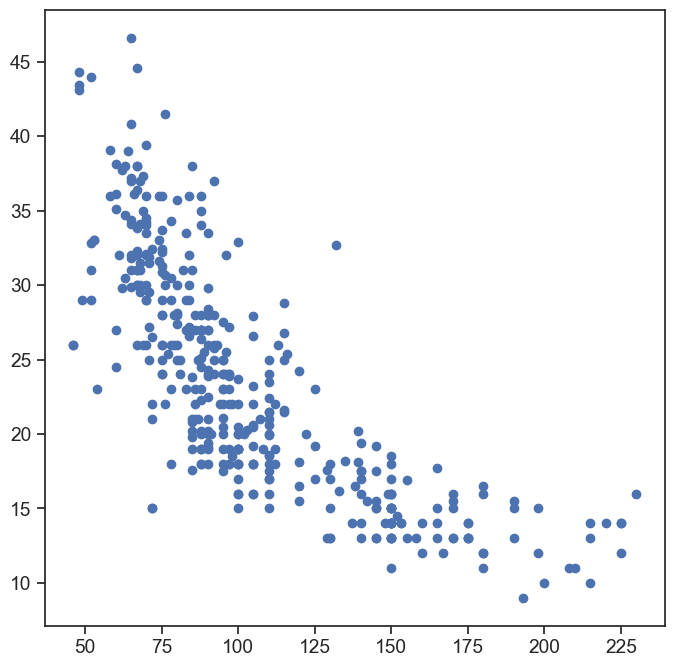

In [146]:
fig, ax = subplots(figsize = (8, 8))
ax.plot(auto["horsepower"], auto["mpg"], "o")

Alternatively, we can use the ```plot()``` method with the call ```Auto.plot()```. Using this method, the variables can be accessed by name. The plot methods of a data frame return a familiar object: an axes. We can use it to update the plot as we did previously...

Text(0.5, 1.0, 'mpg vs horsepower')

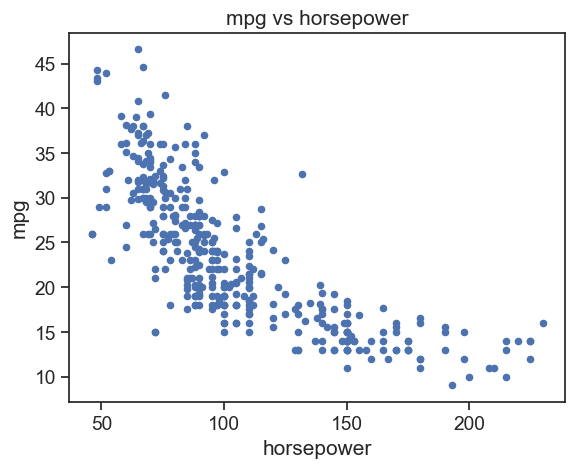

In [147]:
ax = auto.plot.scatter("horsepower", "mpg");
ax.set_title("mpg vs horsepower")

If we want to save the figure that contains a given axes, we can find the relevant figure by accessing the ```figure``` attribute. Uncomment the following code block to save the figure...

In [ ]:
# fig = ax.figure
# fig.savefig("mpg_vs_horsepower.png")

We can further instruct the data frame to plot to a particular axes object. In this case the corresponding ```plot()``` method will return the modified axes we passed in as an argument. Note that when we request a one-dimensional grid of plots, the object ```axes``` is similarly one-dimensional. We place our scatter plot in the middle plot of a row of three plots within a figure...

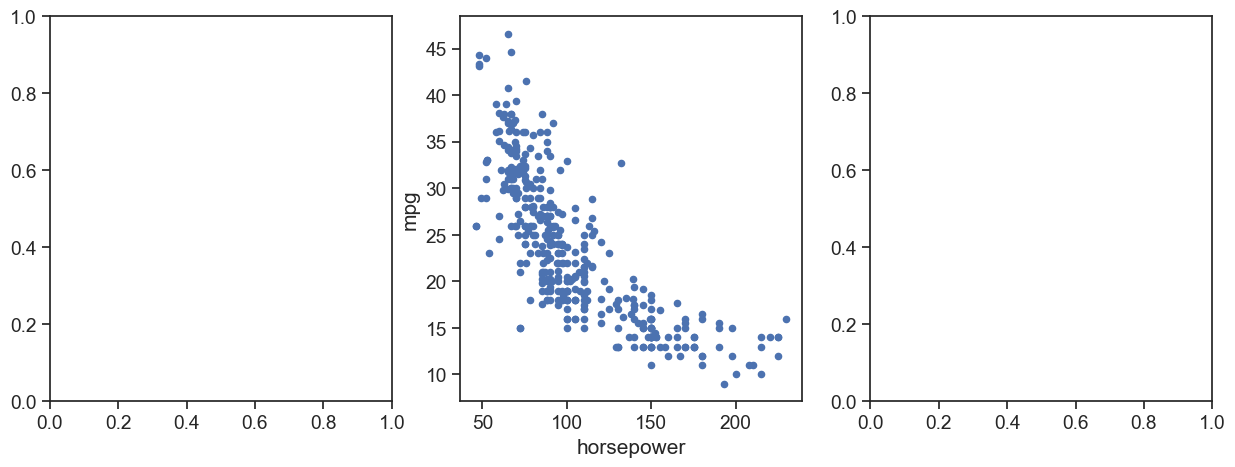

In [148]:
fig, axes = subplots(ncols = 3, figsize = (15, 5))
auto.plot.scatter("horsepower", "mpg", ax = axes[1]);

Note also that the columns of a data frame can be accessed as attributes. We will access the ```auto.horsepower``` data frame...

In [149]:
auto.horsepower

0      130.0
1      165.0
2      150.0
3      150.0
4      140.0
       ...  
392     86.0
393     52.0
394     84.0
395     79.0
396     82.0
Name: horsepower, Length: 392, dtype: float64

Now, we will analyze the ```cylinders``` variable' data. We observe that ```auto.cylinders.dtype``` reveals that ```cylinders``` is being treated as a quantitative variable...

In [150]:
auto.cylinders.dtype

dtype('int64')

However, since there is only a small number of possible values for this variable, we want to treat it as a qualitative. We will replace the ```cylinders``` column with a categorical version of ```auto.cylinders```, using the ```pd.Series()``` function.

In [152]:
auto.cylinders = pd.Series(auto.cylinders, dtype = "category")
auto.cylinders.dtype

CategoricalDtype(categories=[3, 4, 5, 6, 8], ordered=False, categories_dtype=int64)

The function ```pd.Series()``` owes its name to the fact that *pandas* is often used in time series applications.

In [153]:
pd.Series?

Init signature:
pd.Series(
    data=None,
    index=None,
    dtype: 'Dtype | None' = None,
    name=None,
    copy: 'bool | None' = None,
    fastpath: 'bool | lib.NoDefault' = <no_default>,
) -> 'None'
Docstring:     
One-dimensional ndarray with axis labels (including time series).

Labels need not be unique but must be a hashable type. The object
supports both integer- and label-based indexing and provides a host of
methods for performing operations involving the index. Statistical
methods from ndarray have been overridden to automatically exclude
missing data (currently represented as NaN).

Operations between Series (+, -, /, \*, \*\*) align values based on their
associated index values-- they need not be the same length. The result
index will be the sorted union of the two indexes.

Parameters
----------
data : array-like, Iterable, dict, or scalar value
    Contains data stored in Series. If data is a dict, argument order is
    maintained.
index : array-like or Index (1d)
    

Now that ```auto.cylinders``` has been transformed into qualitative data, we can display it using the ```boxplot()``` method...